# West Nile Virus
## Data Cleaning

In [1]:
!ls

data-clean.ipynb     test copy.csv        weather.csv
sampleSubmission.csv test.csv
spray.csv            train.csv


In [2]:
% matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
pd.options.display.max_columns = None


In [3]:
from  matplotlib import rcParams

rcParams['figure.figsize'] = 24, 16
rcParams['figure.dpi'] = 500

In [4]:
spray = pd.read_csv('spray.csv')

spray['datetime'] = pd.to_datetime(spray['Date'])

spray['year'] = spray['datetime'].dt.year
spray['month'] = spray['datetime'].dt.month
spray['day'] = spray['datetime'].dt.day

spray['datetime_index'] = spray['datetime'].copy()
spray.set_index('datetime_index', inplace=True)

spray.sort_index(inplace=True)

spray['record_type'] = 'spray'

spray.head()

Date        Time   Latitude  Longitude   datetime  year  \
datetime_index                                                                  
2011-08-29      2011-08-29  6:56:58 PM  42.391623 -88.089163 2011-08-29  2011   
2011-08-29      2011-08-29  6:57:08 PM  42.391348 -88.089163 2011-08-29  2011   
2011-08-29      2011-08-29  6:57:18 PM  42.391022 -88.089157 2011-08-29  2011   
2011-08-29      2011-08-29  6:57:28 PM  42.390637 -88.089158 2011-08-29  2011   
2011-08-29      2011-08-29  6:57:38 PM  42.390410 -88.088858 2011-08-29  2011   

                month  day record_type  
datetime_index                          
2011-08-29          8   29       spray  
2011-08-29          8   29       spray  
2011-08-29          8   29       spray  
2011-08-29          8   29       spray  
2011-08-29          8   29       spray

In [5]:
test = pd.read_csv('test.csv')
test.head(10)

Id        Date                                            Address  \
0   1  2008-06-11  4100 North Oak Park Avenue, Chicago, IL 60634,...   
1   2  2008-06-11  4100 North Oak Park Avenue, Chicago, IL 60634,...   
2   3  2008-06-11  4100 North Oak Park Avenue, Chicago, IL 60634,...   
3   4  2008-06-11  4100 North Oak Park Avenue, Chicago, IL 60634,...   
4   5  2008-06-11  4100 North Oak Park Avenue, Chicago, IL 60634,...   
5   6  2008-06-11  4100 North Oak Park Avenue, Chicago, IL 60634,...   
6   7  2008-06-11  4100 North Oak Park Avenue, Chicago, IL 60634,...   
7   8  2008-06-11  4100 North Oak Park Avenue, Chicago, IL 60634,...   
8   9  2008-06-11  6200 North Mandell Avenue, Chicago, IL 60646, USA   
9  10  2008-06-11  6200 North Mandell Avenue, Chicago, IL 60646, USA   

                  Species  Block           Street  Trap  \
0  CULEX PIPIENS/RESTUANS     41   N OAK PARK AVE  T002   
1          CULEX RESTUANS     41   N OAK PARK AVE  T002   
2           CULEX PIPIENS     41   N OAK PARK AVE  T002   
3        CULEX SALINARIUS     41   N OAK PARK AVE  T002   
4         CULEX TERRITANS     41   N OAK PARK AVE  T002   
5          CULEX TARSALIS     41   N OAK PARK AVE  T002   
6       UNSPECIFIED CULEX     41   N OAK PARK AVE  T002   
7         CULEX ERRATICUS     41   N OAK PARK AVE  T002   
8  CULEX PIPIENS/RESTUANS     62    N MANDELL AVE  T007   
9          CULEX RESTUANS     62    N MANDELL AVE  T007   

              AddressNumberAndStreet   Latitude  Longitude  AddressAccuracy  
0  4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991                9  
1  4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991                9  
2  4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991                9  
3  4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991                9  
4  4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991                9  
5  4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991                9  
6  4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991                9  
7  4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991                9  
8   6200  N MANDELL AVE, Chicago, IL  41.994991 -87.769279                9  
9   6200  N MANDELL AVE, Chicago, IL  41.994991 -87.769279                9

In [6]:
test.shape

(116293, 11)

In [7]:
train = pd.read_csv('train.csv')
train.head(10)

Date                                            Address  \
0  2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
1  2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
2  2007-05-29  6200 North Mandell Avenue, Chicago, IL 60646, USA   
3  2007-05-29    7900 West Foster Avenue, Chicago, IL 60656, USA   
4  2007-05-29    7900 West Foster Avenue, Chicago, IL 60656, USA   
5  2007-05-29   1500 West Webster Avenue, Chicago, IL 60614, USA   
6  2007-05-29     2500 West Grand Avenue, Chicago, IL 60654, USA   
7  2007-05-29        1100 Roosevelt Road, Chicago, IL 60608, USA   
8  2007-05-29        1100 Roosevelt Road, Chicago, IL 60608, USA   
9  2007-05-29   1100 West Chicago Avenue, Chicago, IL 60642, USA   

                  Species  Block           Street  Trap  \
0  CULEX PIPIENS/RESTUANS     41   N OAK PARK AVE  T002   
1          CULEX RESTUANS     41   N OAK PARK AVE  T002   
2          CULEX RESTUANS     62    N MANDELL AVE  T007   
3  CULEX PIPIENS/RESTUANS     79     W FOSTER AVE  T015   
4          CULEX RESTUANS     79     W FOSTER AVE  T015   
5          CULEX RESTUANS     15    W WEBSTER AVE  T045   
6          CULEX RESTUANS     25      W GRAND AVE  T046   
7  CULEX PIPIENS/RESTUANS     11      W ROOSEVELT  T048   
8          CULEX RESTUANS     11      W ROOSEVELT  T048   
9          CULEX RESTUANS     11        W CHICAGO  T049   

              AddressNumberAndStreet   Latitude  Longitude  AddressAccuracy  \
0  4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991                9   
1  4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991                9   
2   6200  N MANDELL AVE, Chicago, IL  41.994991 -87.769279                9   
3    7900  W FOSTER AVE, Chicago, IL  41.974089 -87.824812                8   
4    7900  W FOSTER AVE, Chicago, IL  41.974089 -87.824812                8   
5   1500  W WEBSTER AVE, Chicago, IL  41.921600 -87.666455                8   
6     2500  W GRAND AVE, Chicago, IL  41.891118 -87.654491                8   
7     1100  W ROOSEVELT, Chicago, IL  41.867108 -87.654224                8   
8     1100  W ROOSEVELT, Chicago, IL  41.867108 -87.654224                8   
9       1100  W CHICAGO, Chicago, IL  41.896282 -87.655232                8   

   NumMosquitos  WnvPresent  
0             1           0  
1             1           0  
2             1           0  
3             1           0  
4             4           0  
5             2           0  
6             1           0  
7             1           0  
8             2           0  
9             1           0

In [8]:
train.shape

(10506, 12)

In [9]:
test.head(1)

Id        Date                                            Address  \
0   1  2008-06-11  4100 North Oak Park Avenue, Chicago, IL 60634,...   

                  Species  Block           Street  Trap  \
0  CULEX PIPIENS/RESTUANS     41   N OAK PARK AVE  T002   

              AddressNumberAndStreet  Latitude  Longitude  AddressAccuracy  
0  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9

In [10]:
train['datetime'] = pd.to_datetime(train['Date'])
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day

test['datetime'] = pd.to_datetime(test['Date'])
test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day


train['datetime_index'] = train['datetime'].copy()
train.set_index('datetime_index', inplace=True)

test['datetime_index'] = test['datetime'].copy()
test.set_index('datetime_index', inplace=True)

# train.sort_index(inplace=True)
# test.sort_index(inplace=True)

mosquitos = pd.concat([train, train])

mosquitos.sort_index(inplace=True)

mosquitos['record_type'] = 'train'

mosquitos.head(1)

Date                                            Address  \
datetime_index                                                                  
2007-05-29      2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   

                               Species  Block           Street  Trap  \
datetime_index                                                         
2007-05-29      CULEX PIPIENS/RESTUANS     41   N OAK PARK AVE  T002   

                           AddressNumberAndStreet  Latitude  Longitude  \
datetime_index                                                           
2007-05-29      4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991   

                AddressAccuracy  NumMosquitos  WnvPresent   datetime  year  \
datetime_index                                                               
2007-05-29                    9             1           0 2007-05-29  2007   

                month  day record_type  
datetime_index                          
2007-05-29          5   29       train

In [20]:
mosquitos.groupby(['Trap', 'year', 'month']).mean()

Block   Latitude  Longitude  AddressAccuracy  NumMosquitos  \
Trap year month                                                               
T001 2007 6       40.0  41.953705 -87.733974              8.0      1.000000   
          7       40.0  41.953705 -87.733974              8.0      1.000000   
          8       40.0  41.953705 -87.733974              8.0      2.111111   
          9       40.0  41.953705 -87.733974              8.0      1.000000   
          10      40.0  41.953705 -87.733974              8.0      1.000000   
T002 2007 5       41.0  41.954690 -87.800991              9.0      1.000000   
          6       41.0  41.954690 -87.800991              9.0      2.428571   
          7       41.0  41.954690 -87.800991              9.0      7.272727   
          8       41.0  41.954690 -87.800991              9.0     22.944444   
          9       41.0  41.954690 -87.800991              9.0     18.250000   
          10      41.0  41.954690 -87.800991              9.0     27.333333   
     2009 5       41.0  41.954690 -87.800991              9.0      2.000000   
          6       41.0  41.954690 -87.800991              9.0     14.538462   
          7       41.0  41.954690 -87.800991              9.0     25.090909   
          8       41.0  41.954690 -87.800991              9.0      8.500000   
          9       41.0  41.954690 -87.800991              9.0      6.833333   
     2011 6       41.0  41.954690 -87.800991              9.0     11.600000   
          7       41.0  41.954690 -87.800991              9.0     17.300000   
          8       41.0  41.954690 -87.800991              9.0     13.000000   
          9       41.0  41.954690 -87.800991              9.0      5.666667   
     2013 6       41.0  41.954690 -87.800991              9.0     30.916667   
          7       41.0  41.954690 -87.800991              9.0     40.454545   
          8       41.0  41.954690 -87.800991              9.0     21.000000   
          9       41.0  41.954690 -87.800991              9.0     19.333333   
T003 2007 6       46.0  41.964242 -87.757639              8.0      2.000000   
          7       46.0  41.964242 -87.757639              8.0      1.500000   
          8       46.0  41.964242 -87.757639              8.0     10.250000   
          9       46.0  41.964242 -87.757639              8.0      4.000000   
          10      46.0  41.964242 -87.757639              8.0      9.500000   
     2009 5       46.0  41.964242 -87.757639              8.0      1.000000   
...                ...        ...        ...              ...           ...   
T236 2013 9       62.0  41.994679 -87.770899              8.0      8.500000   
T237 2011 9       29.0  41.738903 -87.695443              8.0      6.000000   
T238 2011 9       34.0  41.753391 -87.707394              8.0      4.857143   
T900 2009 5       10.0  41.974689 -87.890615              9.0     17.000000   
          6       10.0  41.974689 -87.890615              9.0     32.344086   
          7       10.0  41.974689 -87.890615              9.0     18.759036   
          8       10.0  41.974689 -87.890615              9.0     13.294118   
          9       10.0  41.974689 -87.890615              9.0      4.974359   
          10      10.0  41.974689 -87.890615              9.0      3.400000   
     2011 6       10.0  41.974689 -87.890615              9.0     20.014286   
          7       10.0  41.974689 -87.890615              9.0     23.815385   
          8       10.0  41.974689 -87.890615              9.0     13.448980   
          9       10.0  41.974689 -87.890615              9.0     10.927273   
     2013 6       10.0  41.974689 -87.890615              9.0     20.977778   
          7       10.0  41.974689 -87.890615              9.0     23.237288   
          8       10.0  41.974689 -87.890615              9.0     24.272727   
          9       10.0  41.974689 -87.890615              9.0     26.913043   
T903 2009 6       10.0  41.957799 -87.930995              5.0     3

In [12]:
weather = pd.read_csv('weather.csv')

weather['datetime'] = pd.to_datetime(weather['Date'])

weather['year'] = weather['datetime'].dt.year
weather['month'] = weather['datetime'].dt.month
weather['day'] = weather['datetime'].dt.day

weather['datetime_index'] = weather['datetime'].copy()
weather.set_index('datetime_index', inplace=True)

weather.sort_index(inplace=True)

weather['record_type'] = 'weather'

weather.head(1)


Station        Date  Tmax  Tmin Tavg Depart  DewPoint WetBulb  \
datetime_index                                                                  
2007-05-01            1  2007-05-01    83    50   67     14        51      56   

               Heat Cool Sunrise Sunset CodeSum Depth Water1 SnowFall  \
datetime_index                                                          
2007-05-01        0    2    0448   1849             0      M      0.0   

               PrecipTotal StnPressure SeaLevel  ResultSpeed  ResultDir  \
datetime_index                                                            
2007-05-01            0.00       29.10    29.82          1.7         27   

               AvgSpeed   datetime  year  month  day record_type  
datetime_index                                                    
2007-05-01          9.2 2007-05-01  2007      5    1     weather

In [13]:
weather.shape

(2944, 27)

In [14]:
weather.head()

Station        Date  Tmax  Tmin Tavg Depart  DewPoint WetBulb  \
datetime_index                                                                  
2007-05-01            1  2007-05-01    83    50   67     14        51      56   
2007-05-01            2  2007-05-01    84    52   68      M        51      57   
2007-05-02            1  2007-05-02    59    42   51     -3        42      47   
2007-05-02            2  2007-05-02    60    43   52      M        42      47   
2007-05-03            1  2007-05-03    66    46   56      2        40      48   

               Heat Cool Sunrise Sunset CodeSum Depth Water1 SnowFall  \
datetime_index                                                          
2007-05-01        0    2    0448   1849             0      M      0.0   
2007-05-01        0    3       -      -             M      M        M   
2007-05-02       14    0    0447   1850      BR     0      M      0.0   
2007-05-02       13    0       -      -   BR HZ     M      M        M   
2007-05-03        9    0    0446   1851             0      M      0.0   

               PrecipTotal StnPressure SeaLevel  ResultSpeed  ResultDir  \
datetime_index                                                            
2007-05-01            0.00       29.10    29.82          1.7         27   
2007-05-01            0.00       29.18    29.82          2.7         25   
2007-05-02            0.00       29.38    30.09         13.0          4   
2007-05-02            0.00       29.44    30.08         13.3          2   
2007-05-03            0.00       29.39    30.12         11.7          7   

               AvgSpeed   datetime  year  month  day record_type  
datetime_index                                                    
2007-05-01          9.2 2007-05-01  2007      5    1     weather  
2007-05-01          9.6 2007-05-01  2007      5    1     weather  
2007-05-02         13.4 2007-05-02  2007      5    2     weather  
2007-05-02         13.4 2007-05-02  2007      5    2     weather  
2007-05-03         11.9 2007-05-03  2007      5    3     weather

In [15]:
!ls

data-clean.ipynb     test copy.csv        weather.csv
sampleSubmission.csv test.csv
spray.csv            train.csv


2007 7622


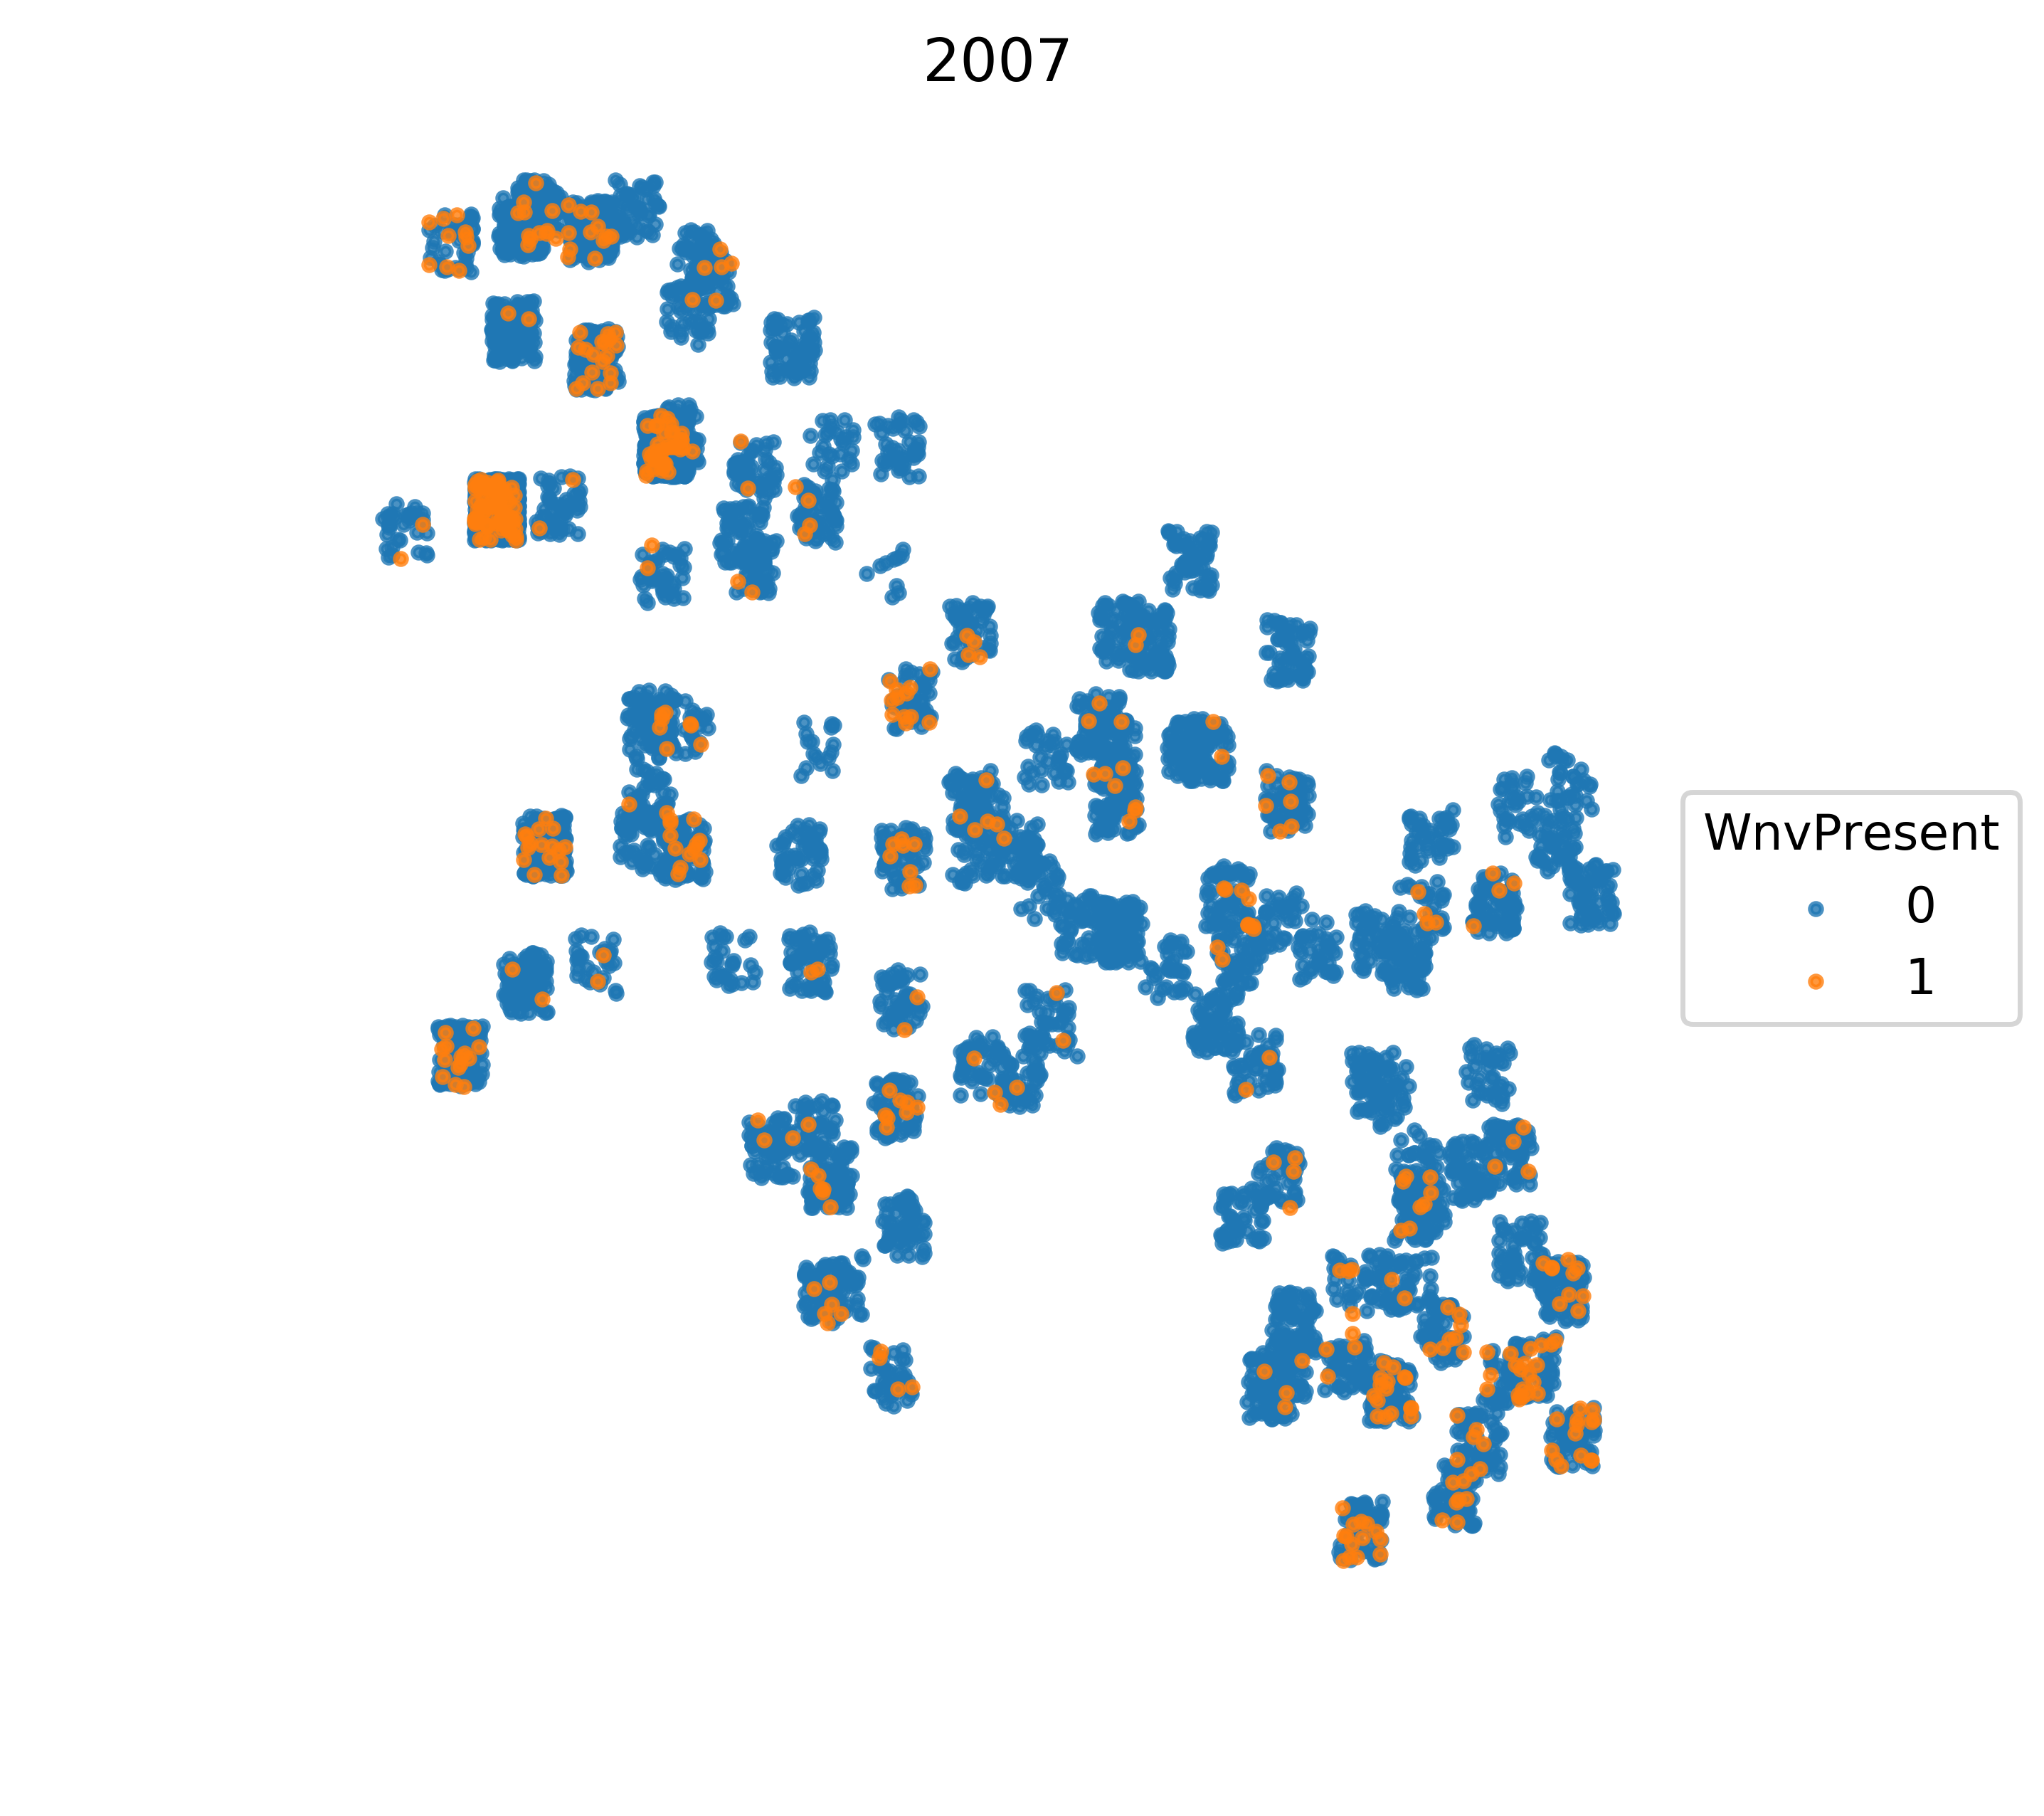

2008 0


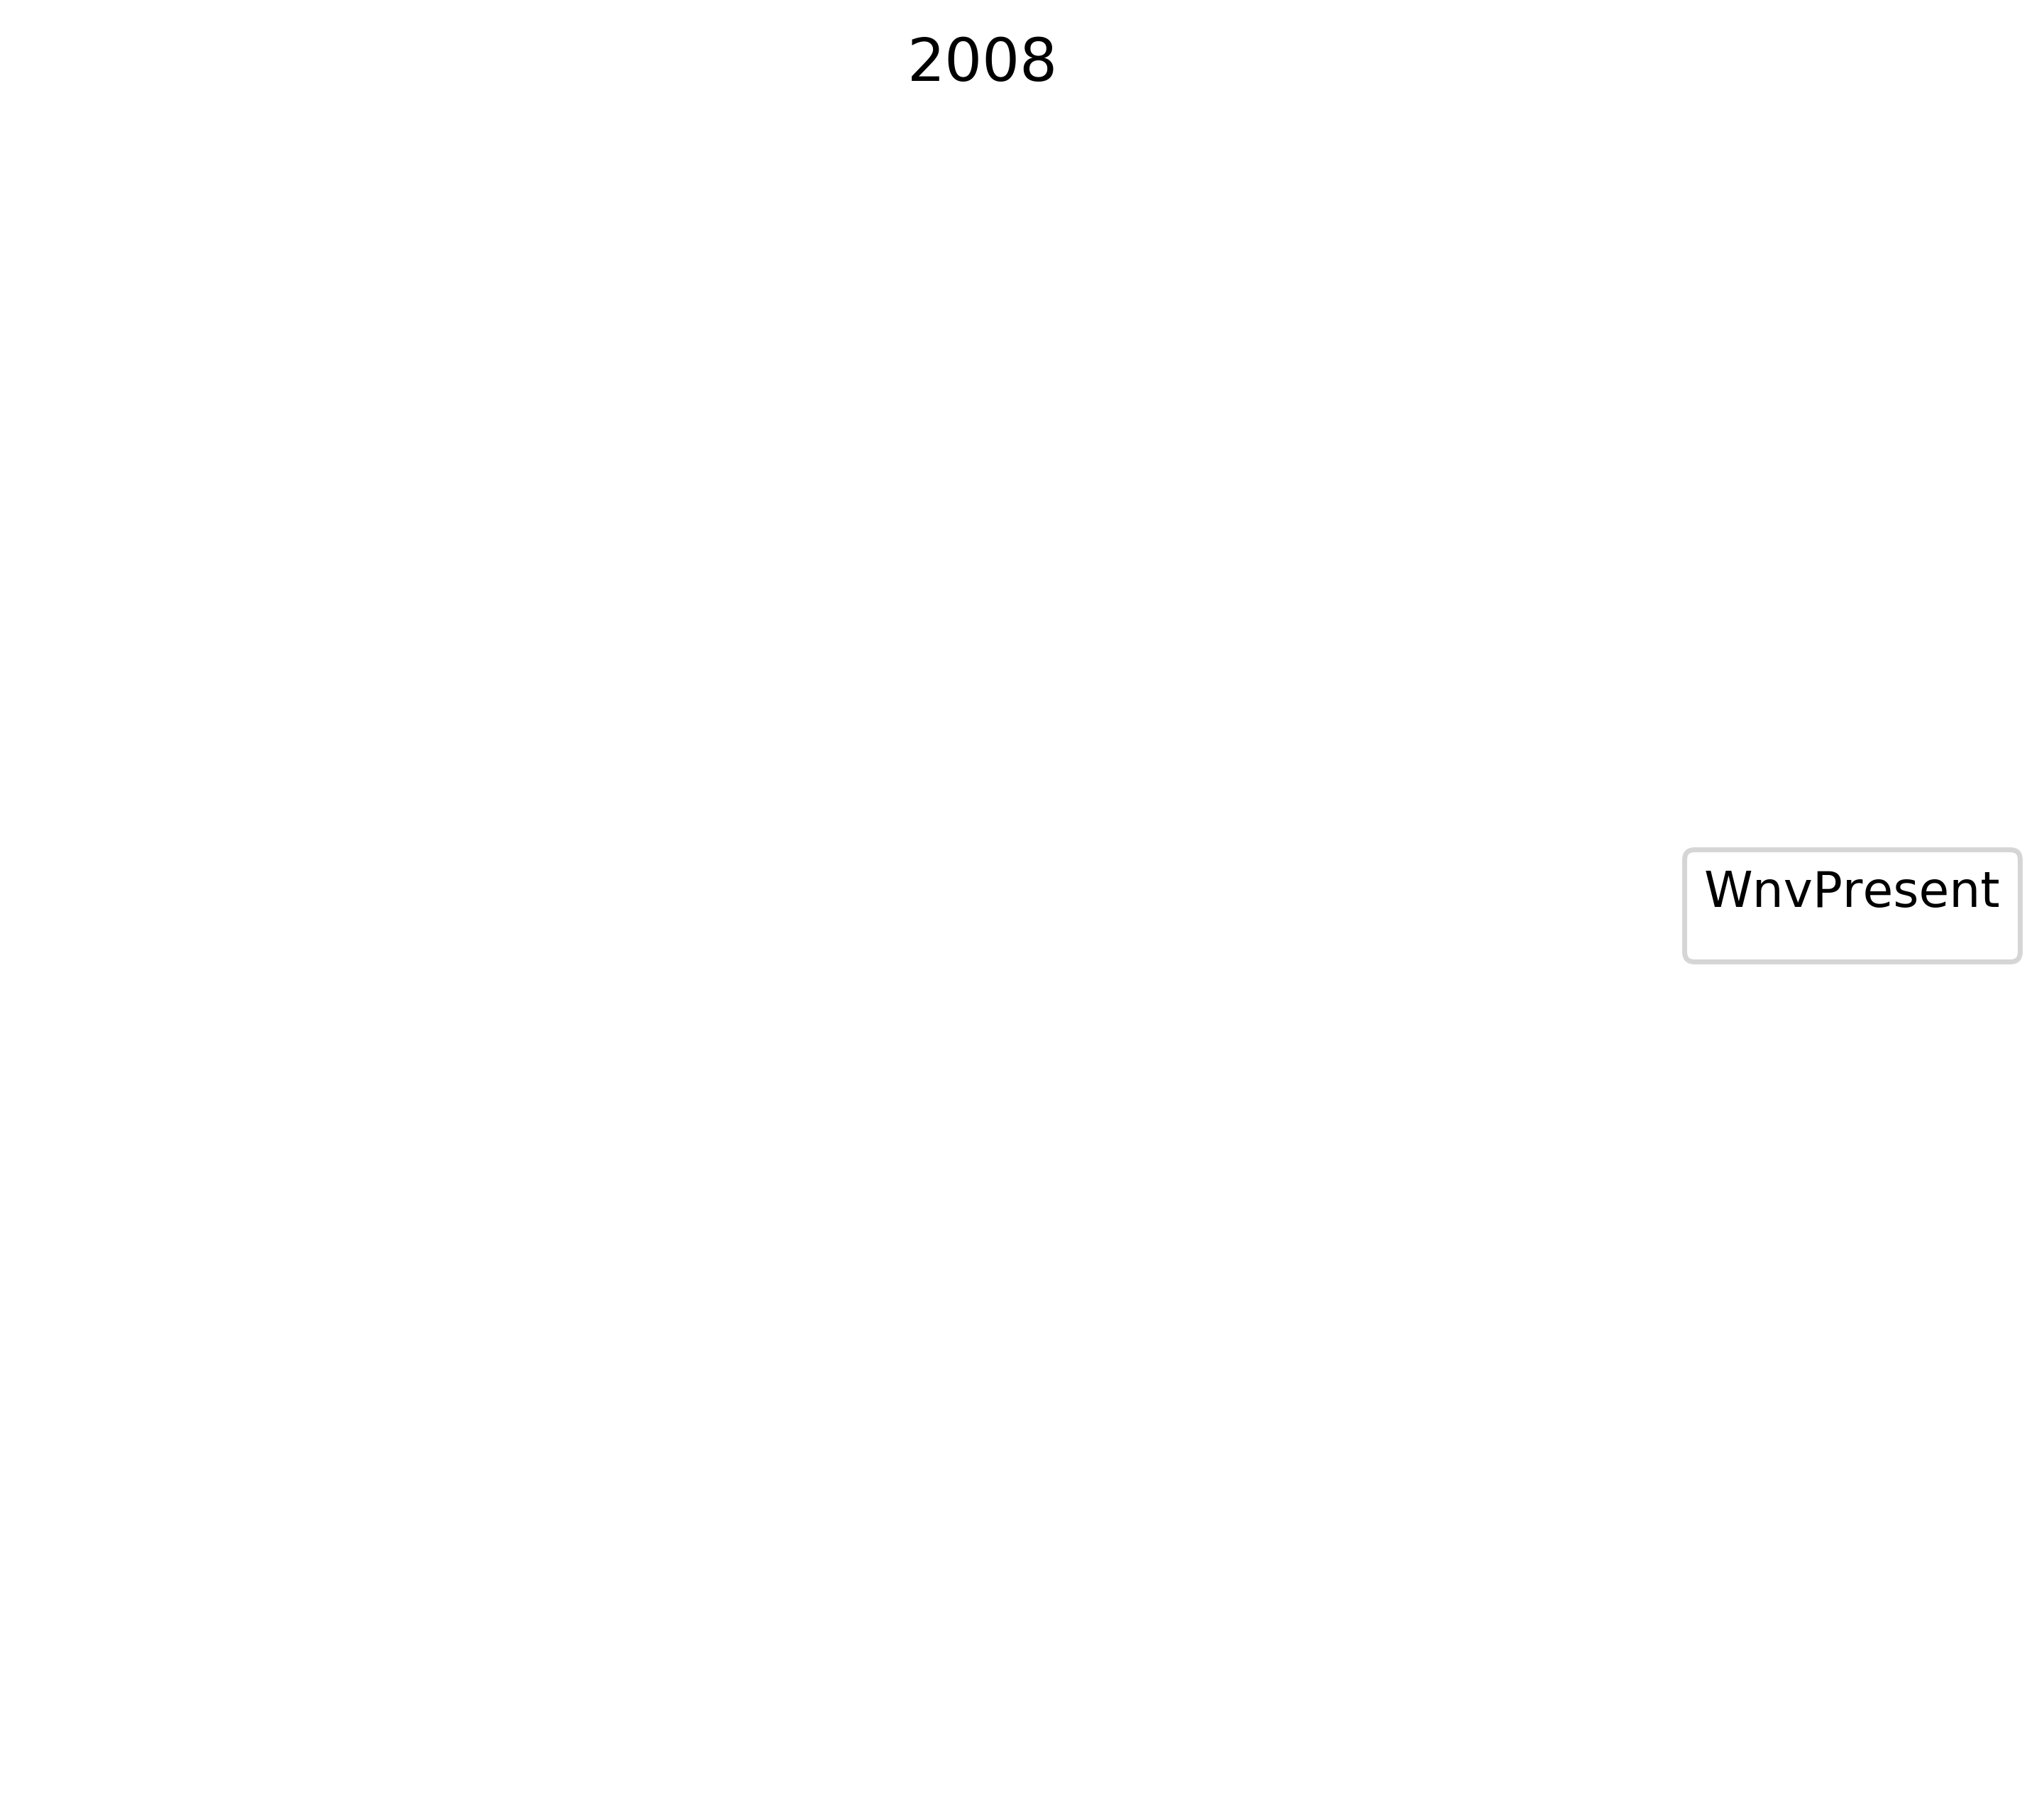

2009 4498


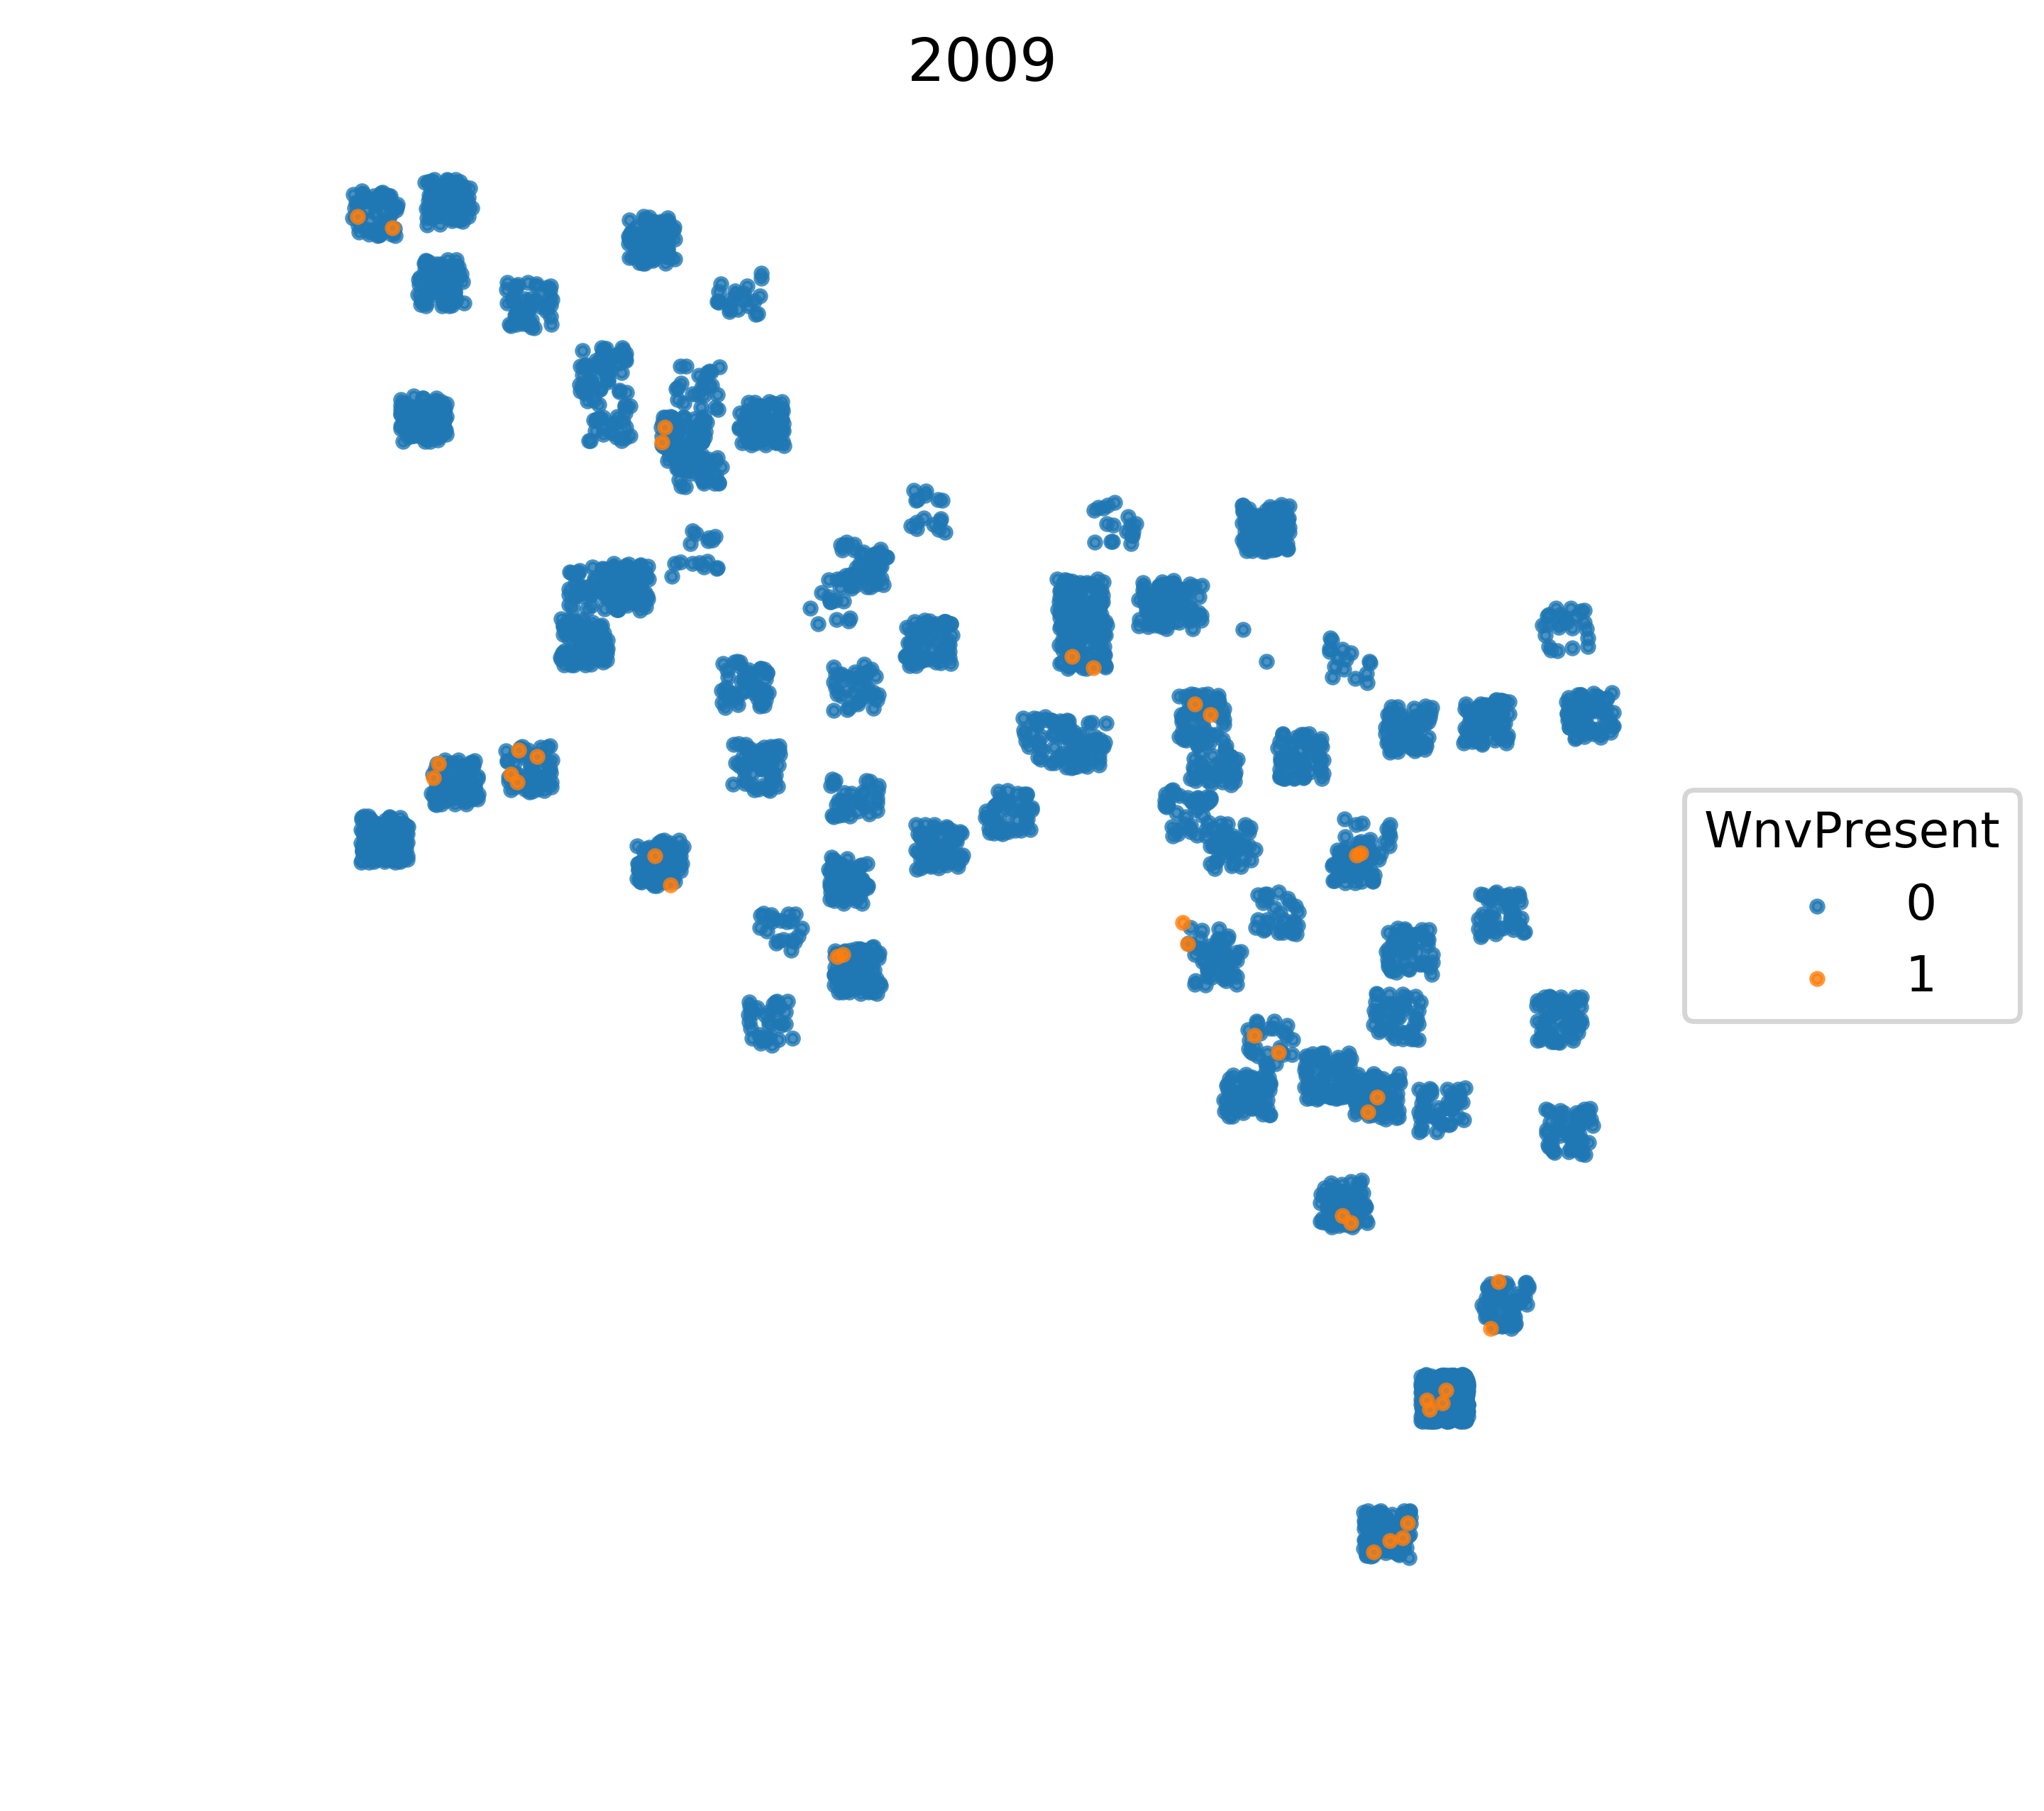

2010 0


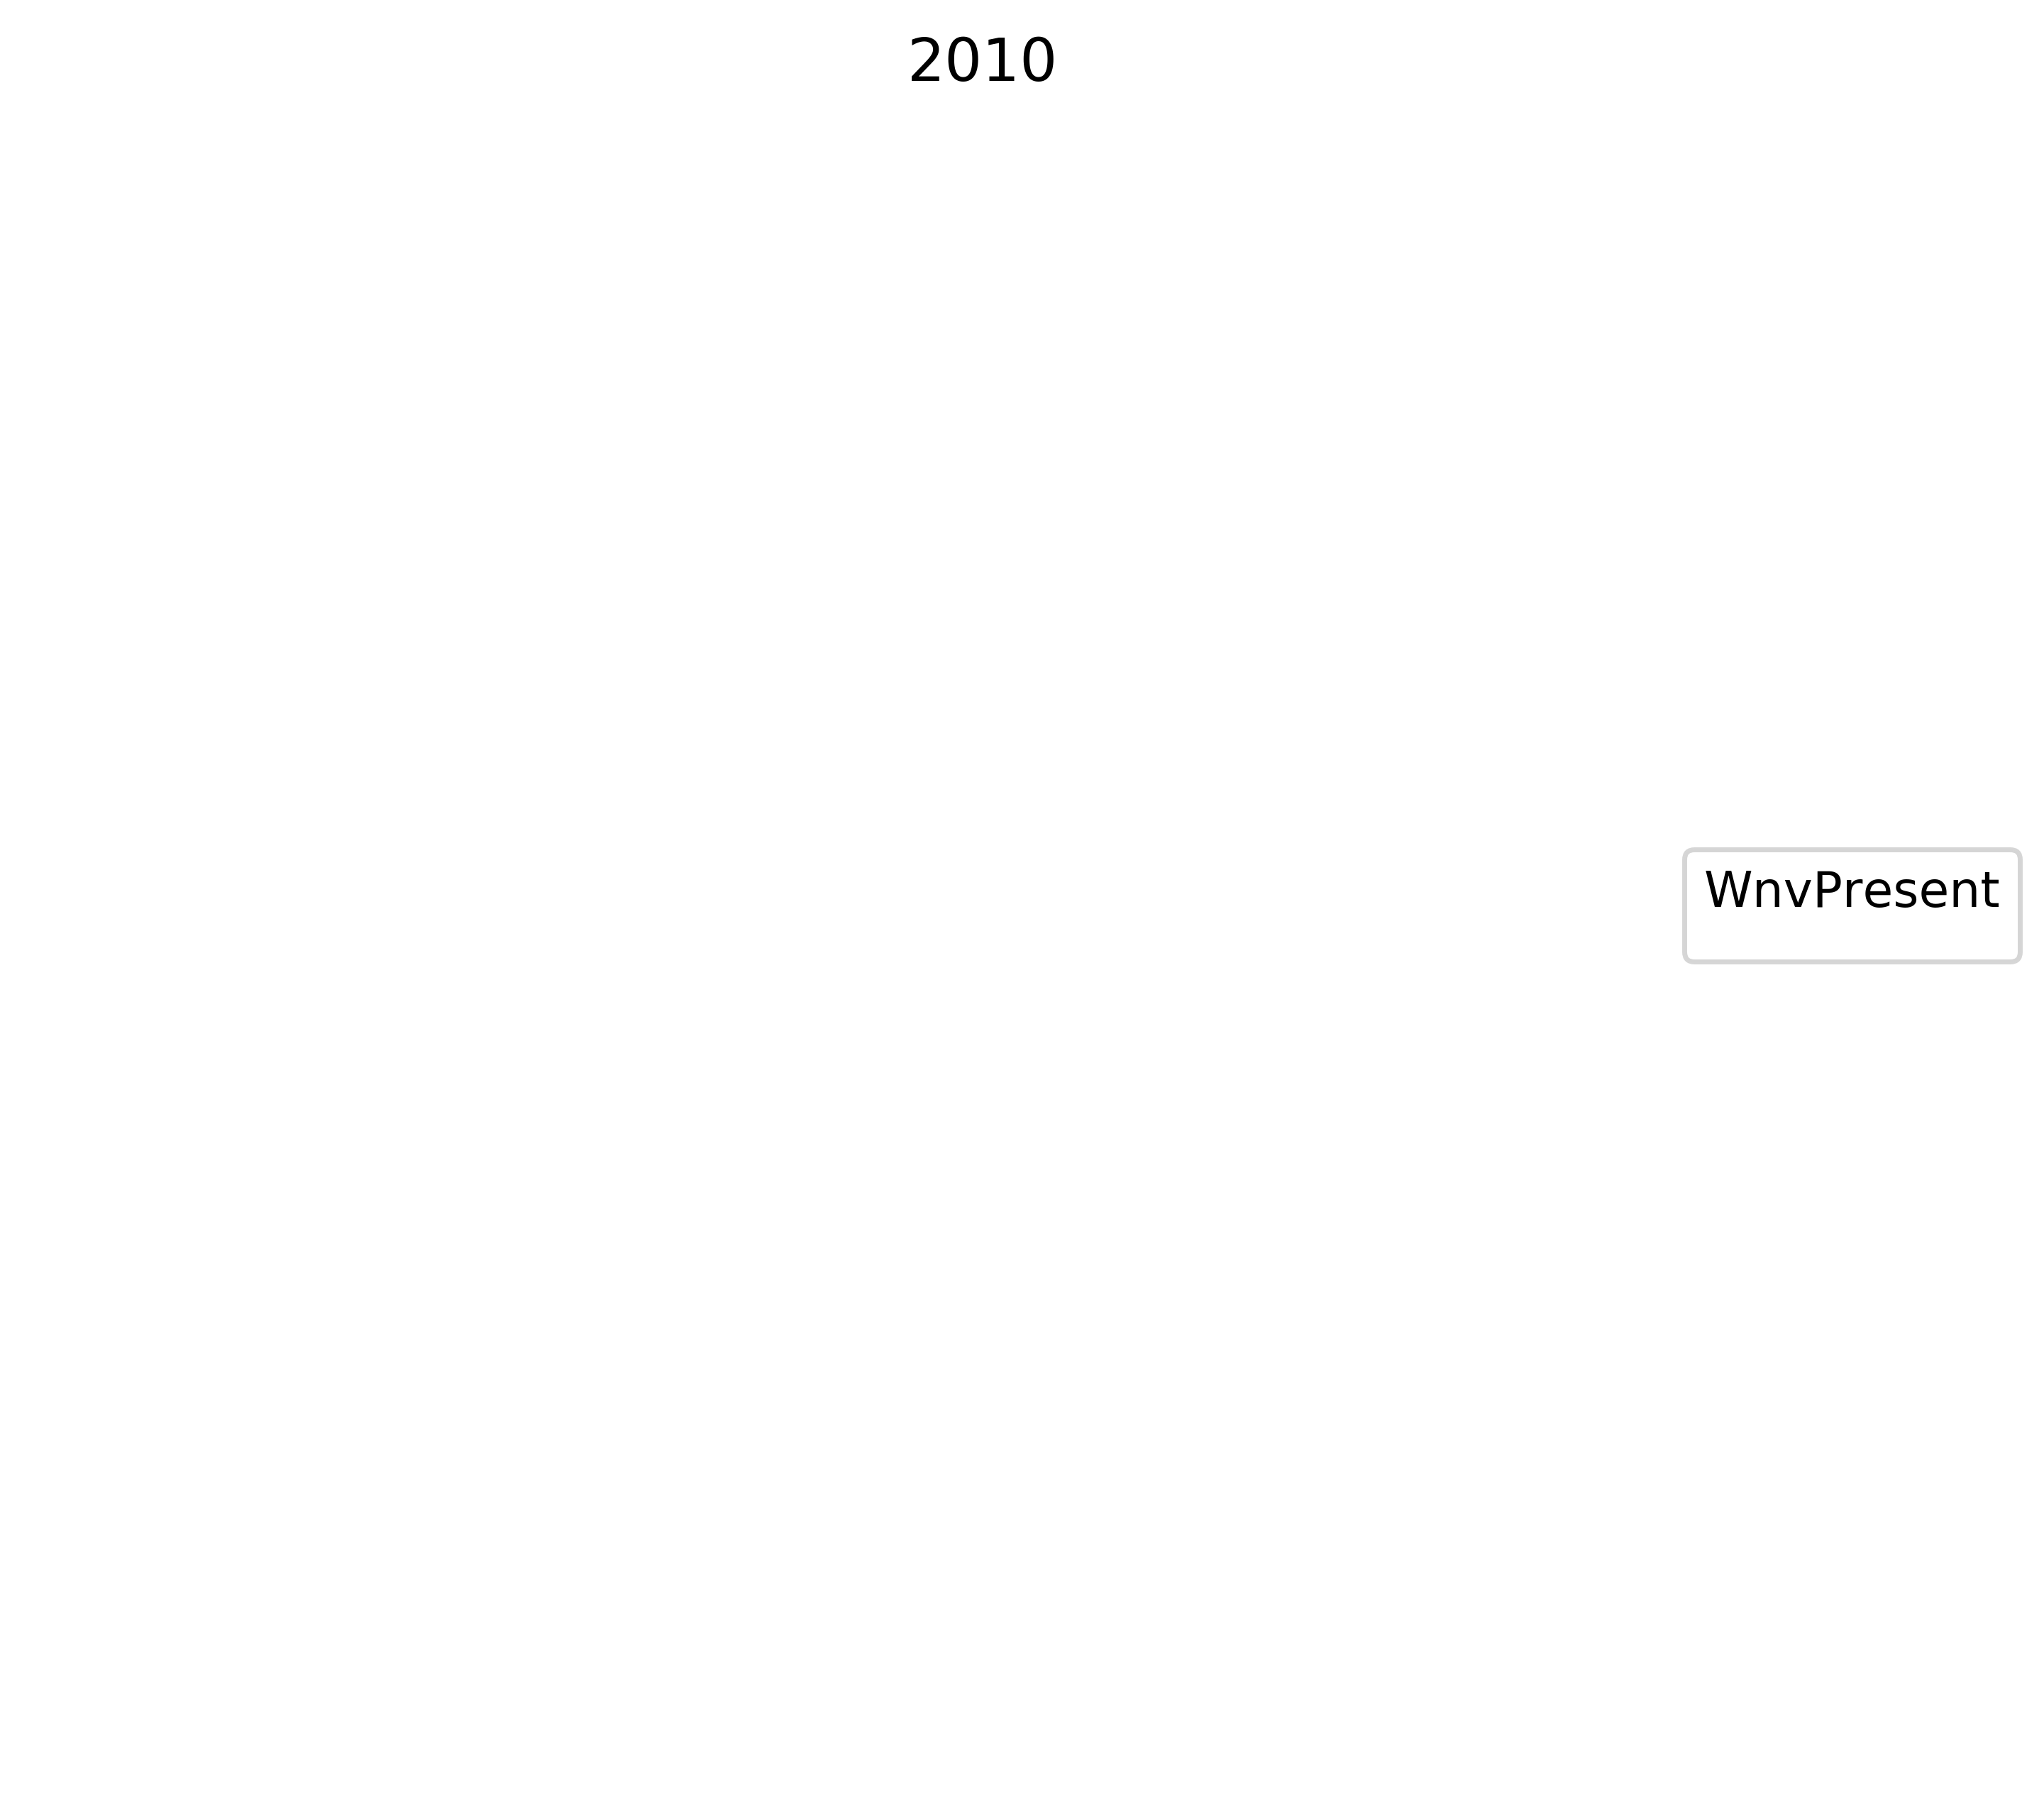

2011 4108


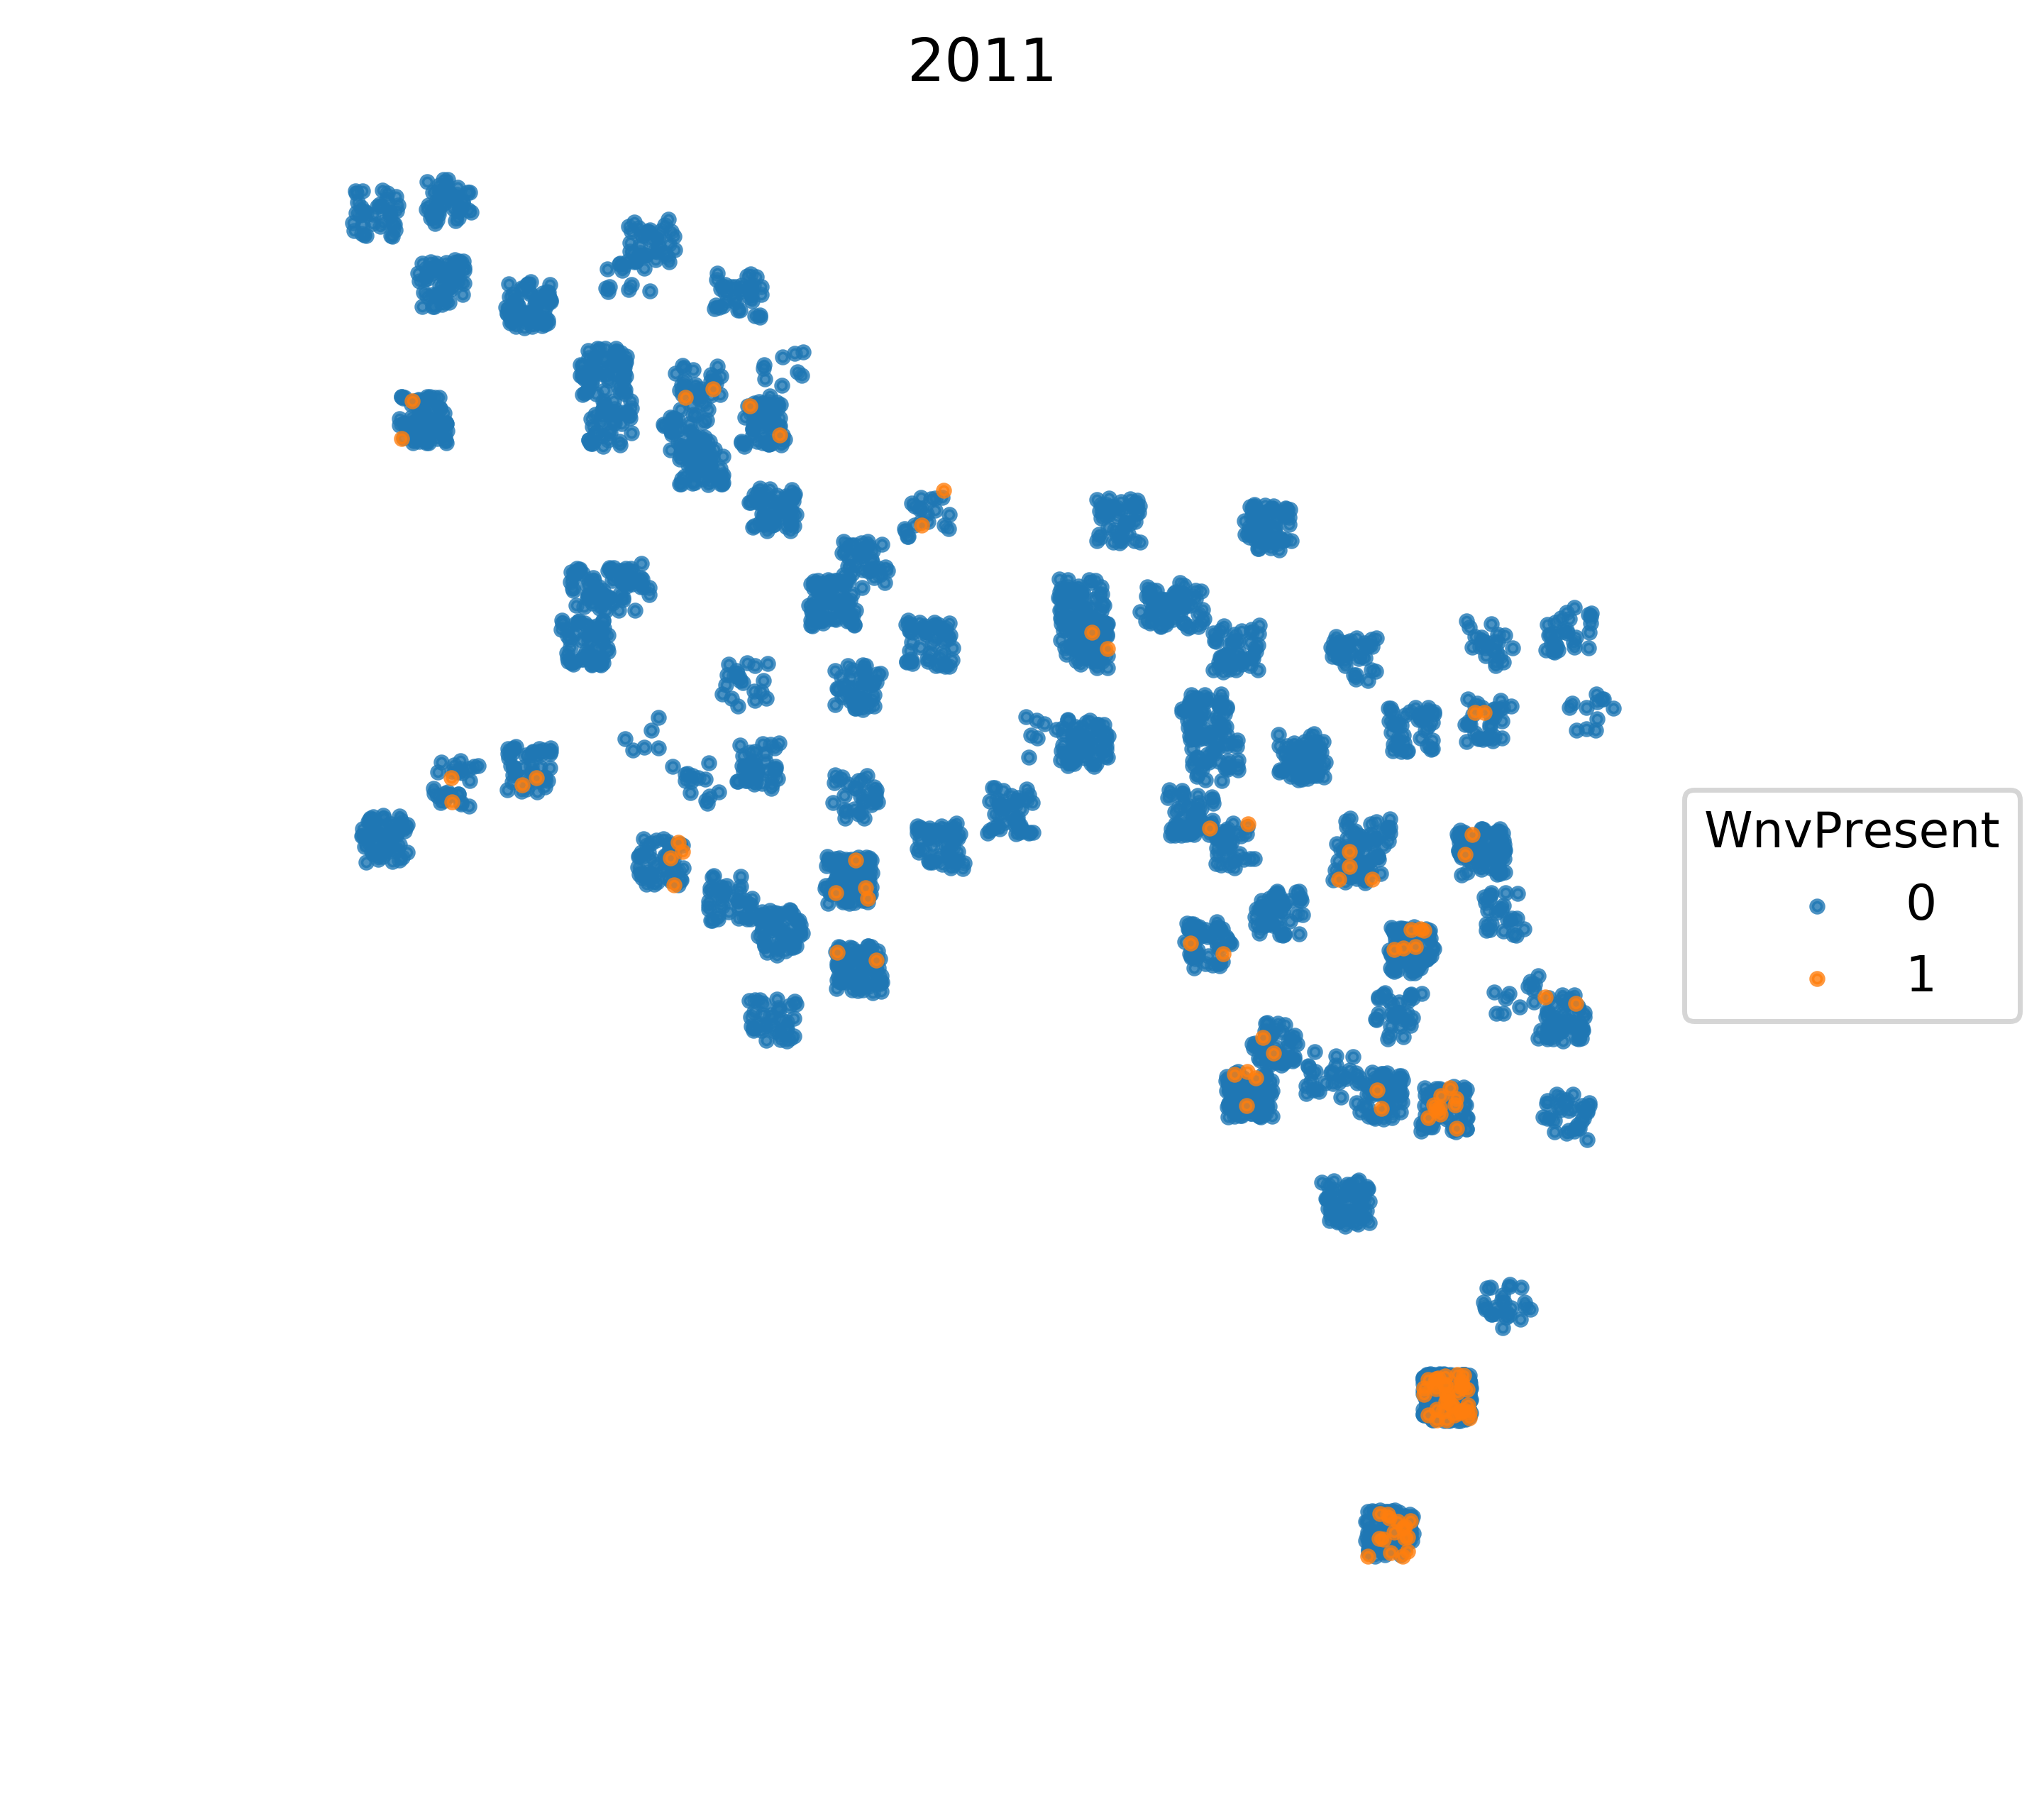

2012 0


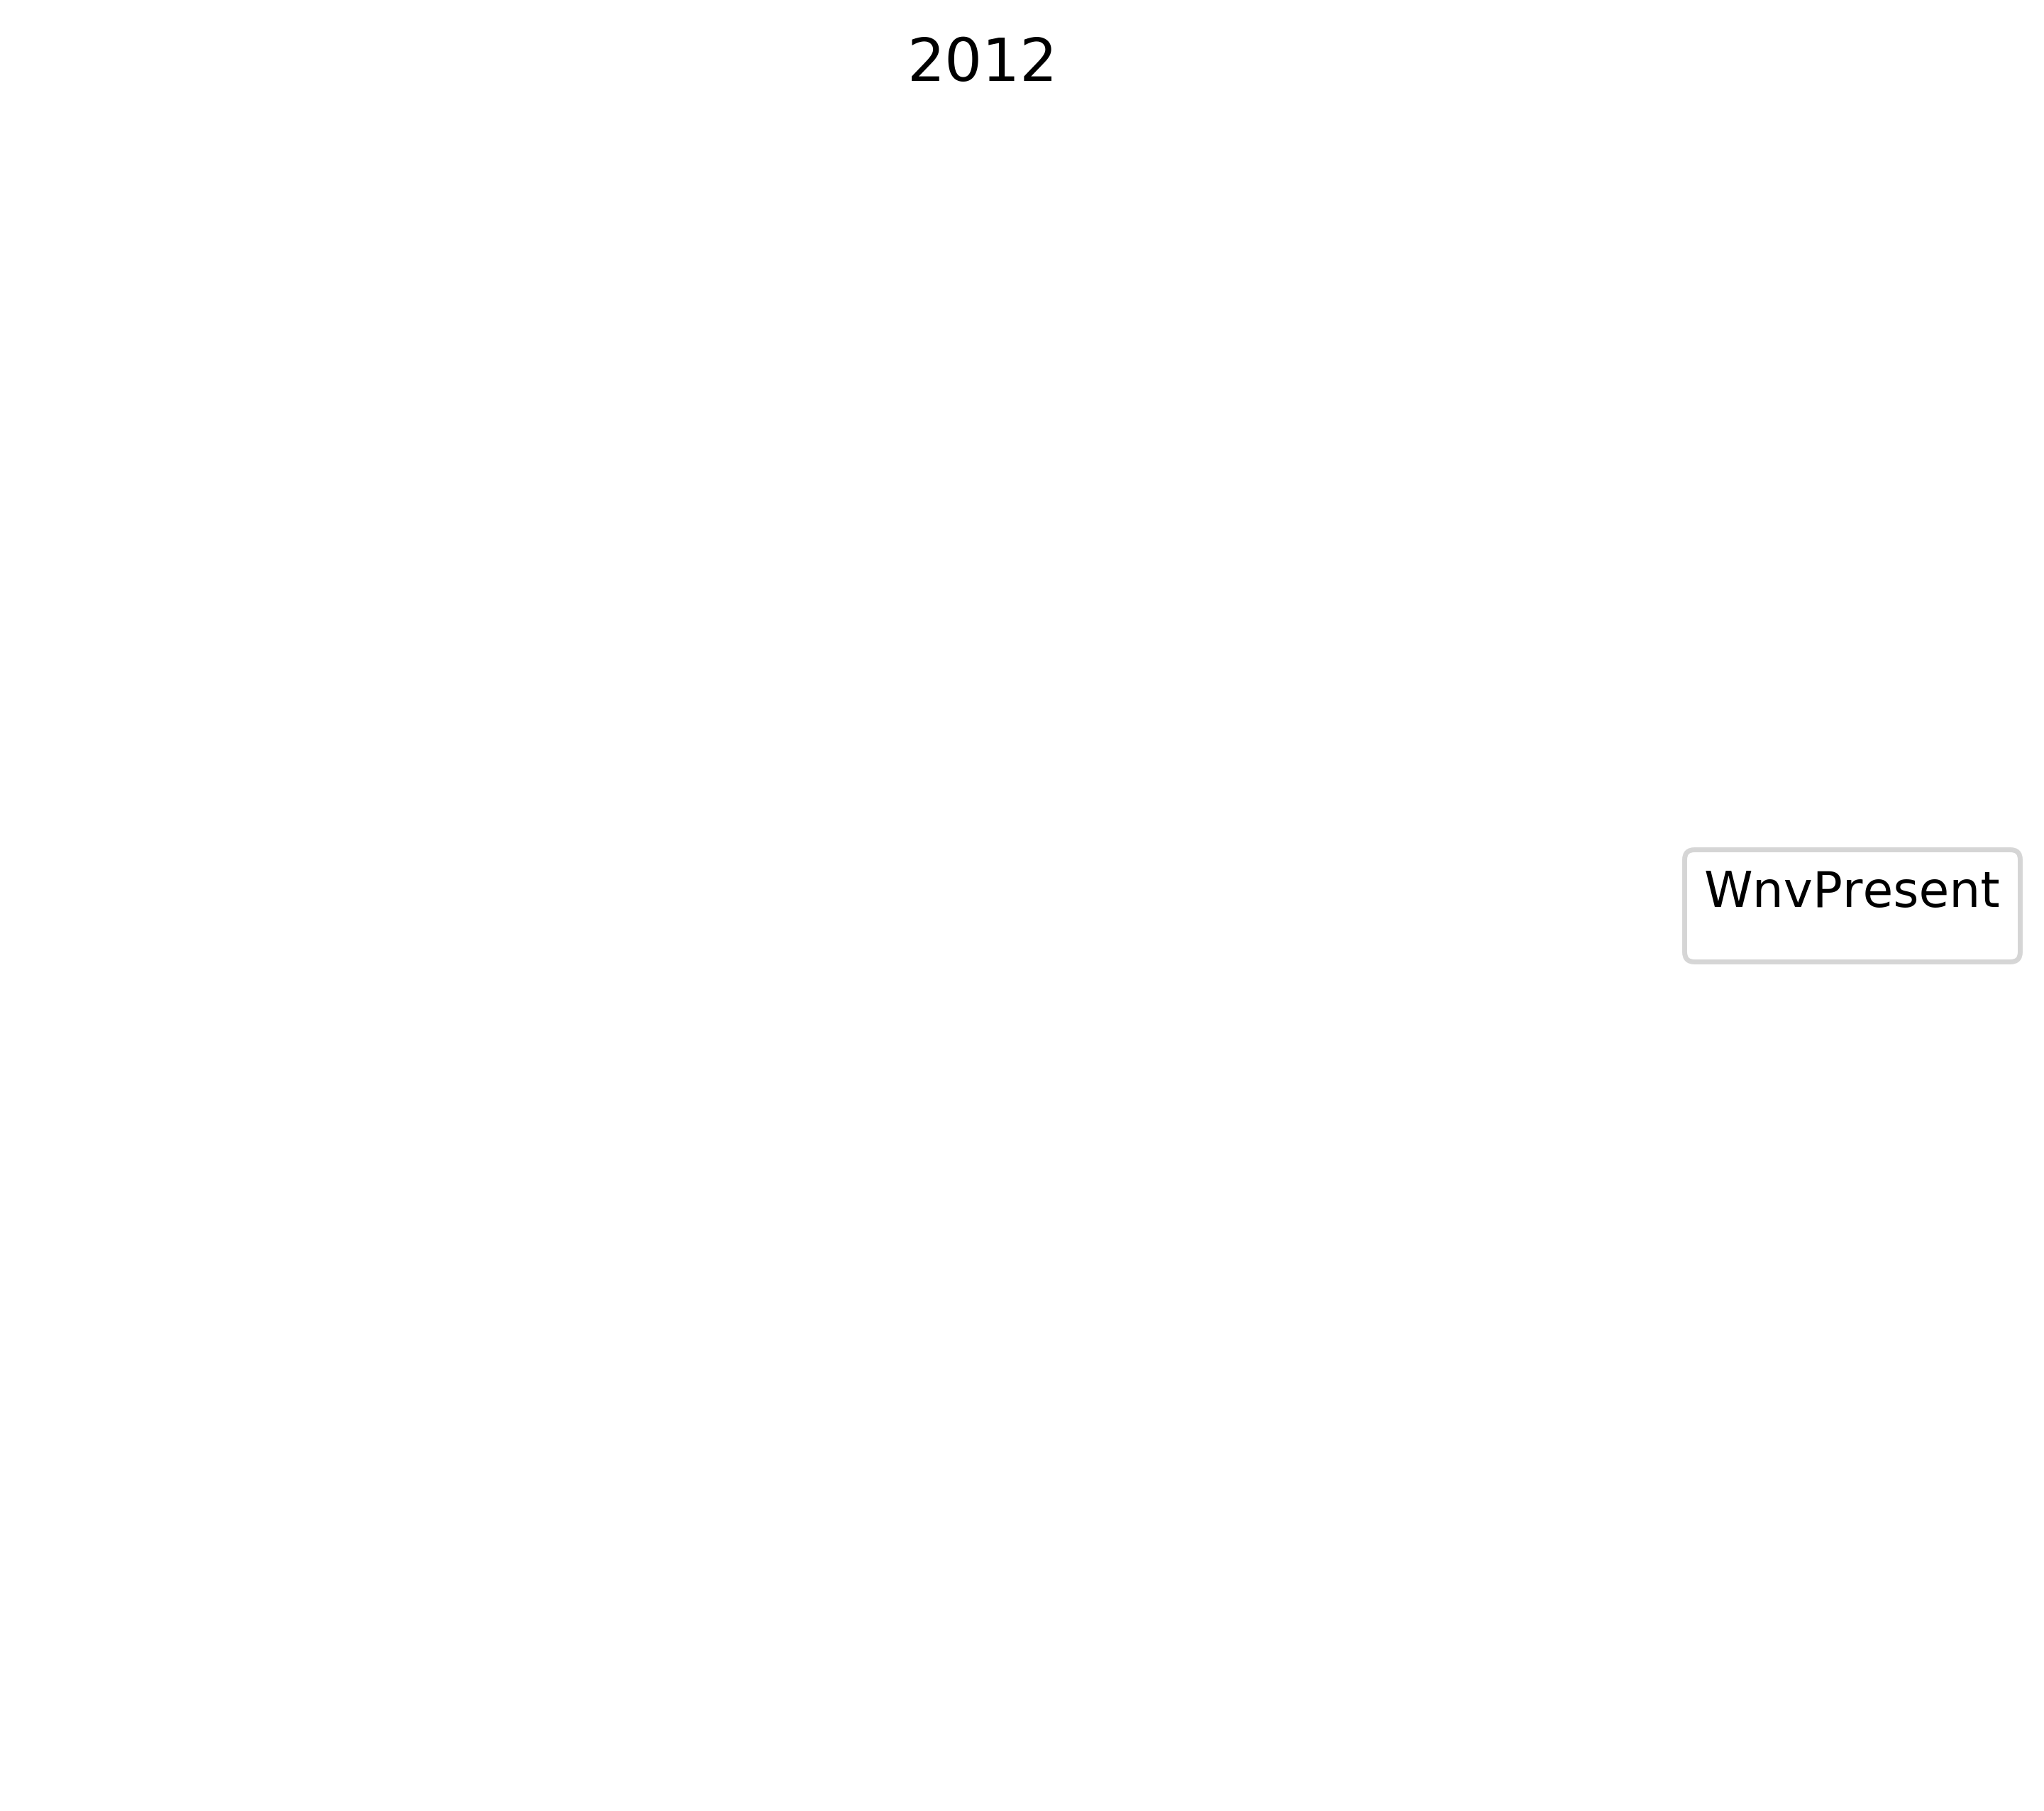

2013 4784


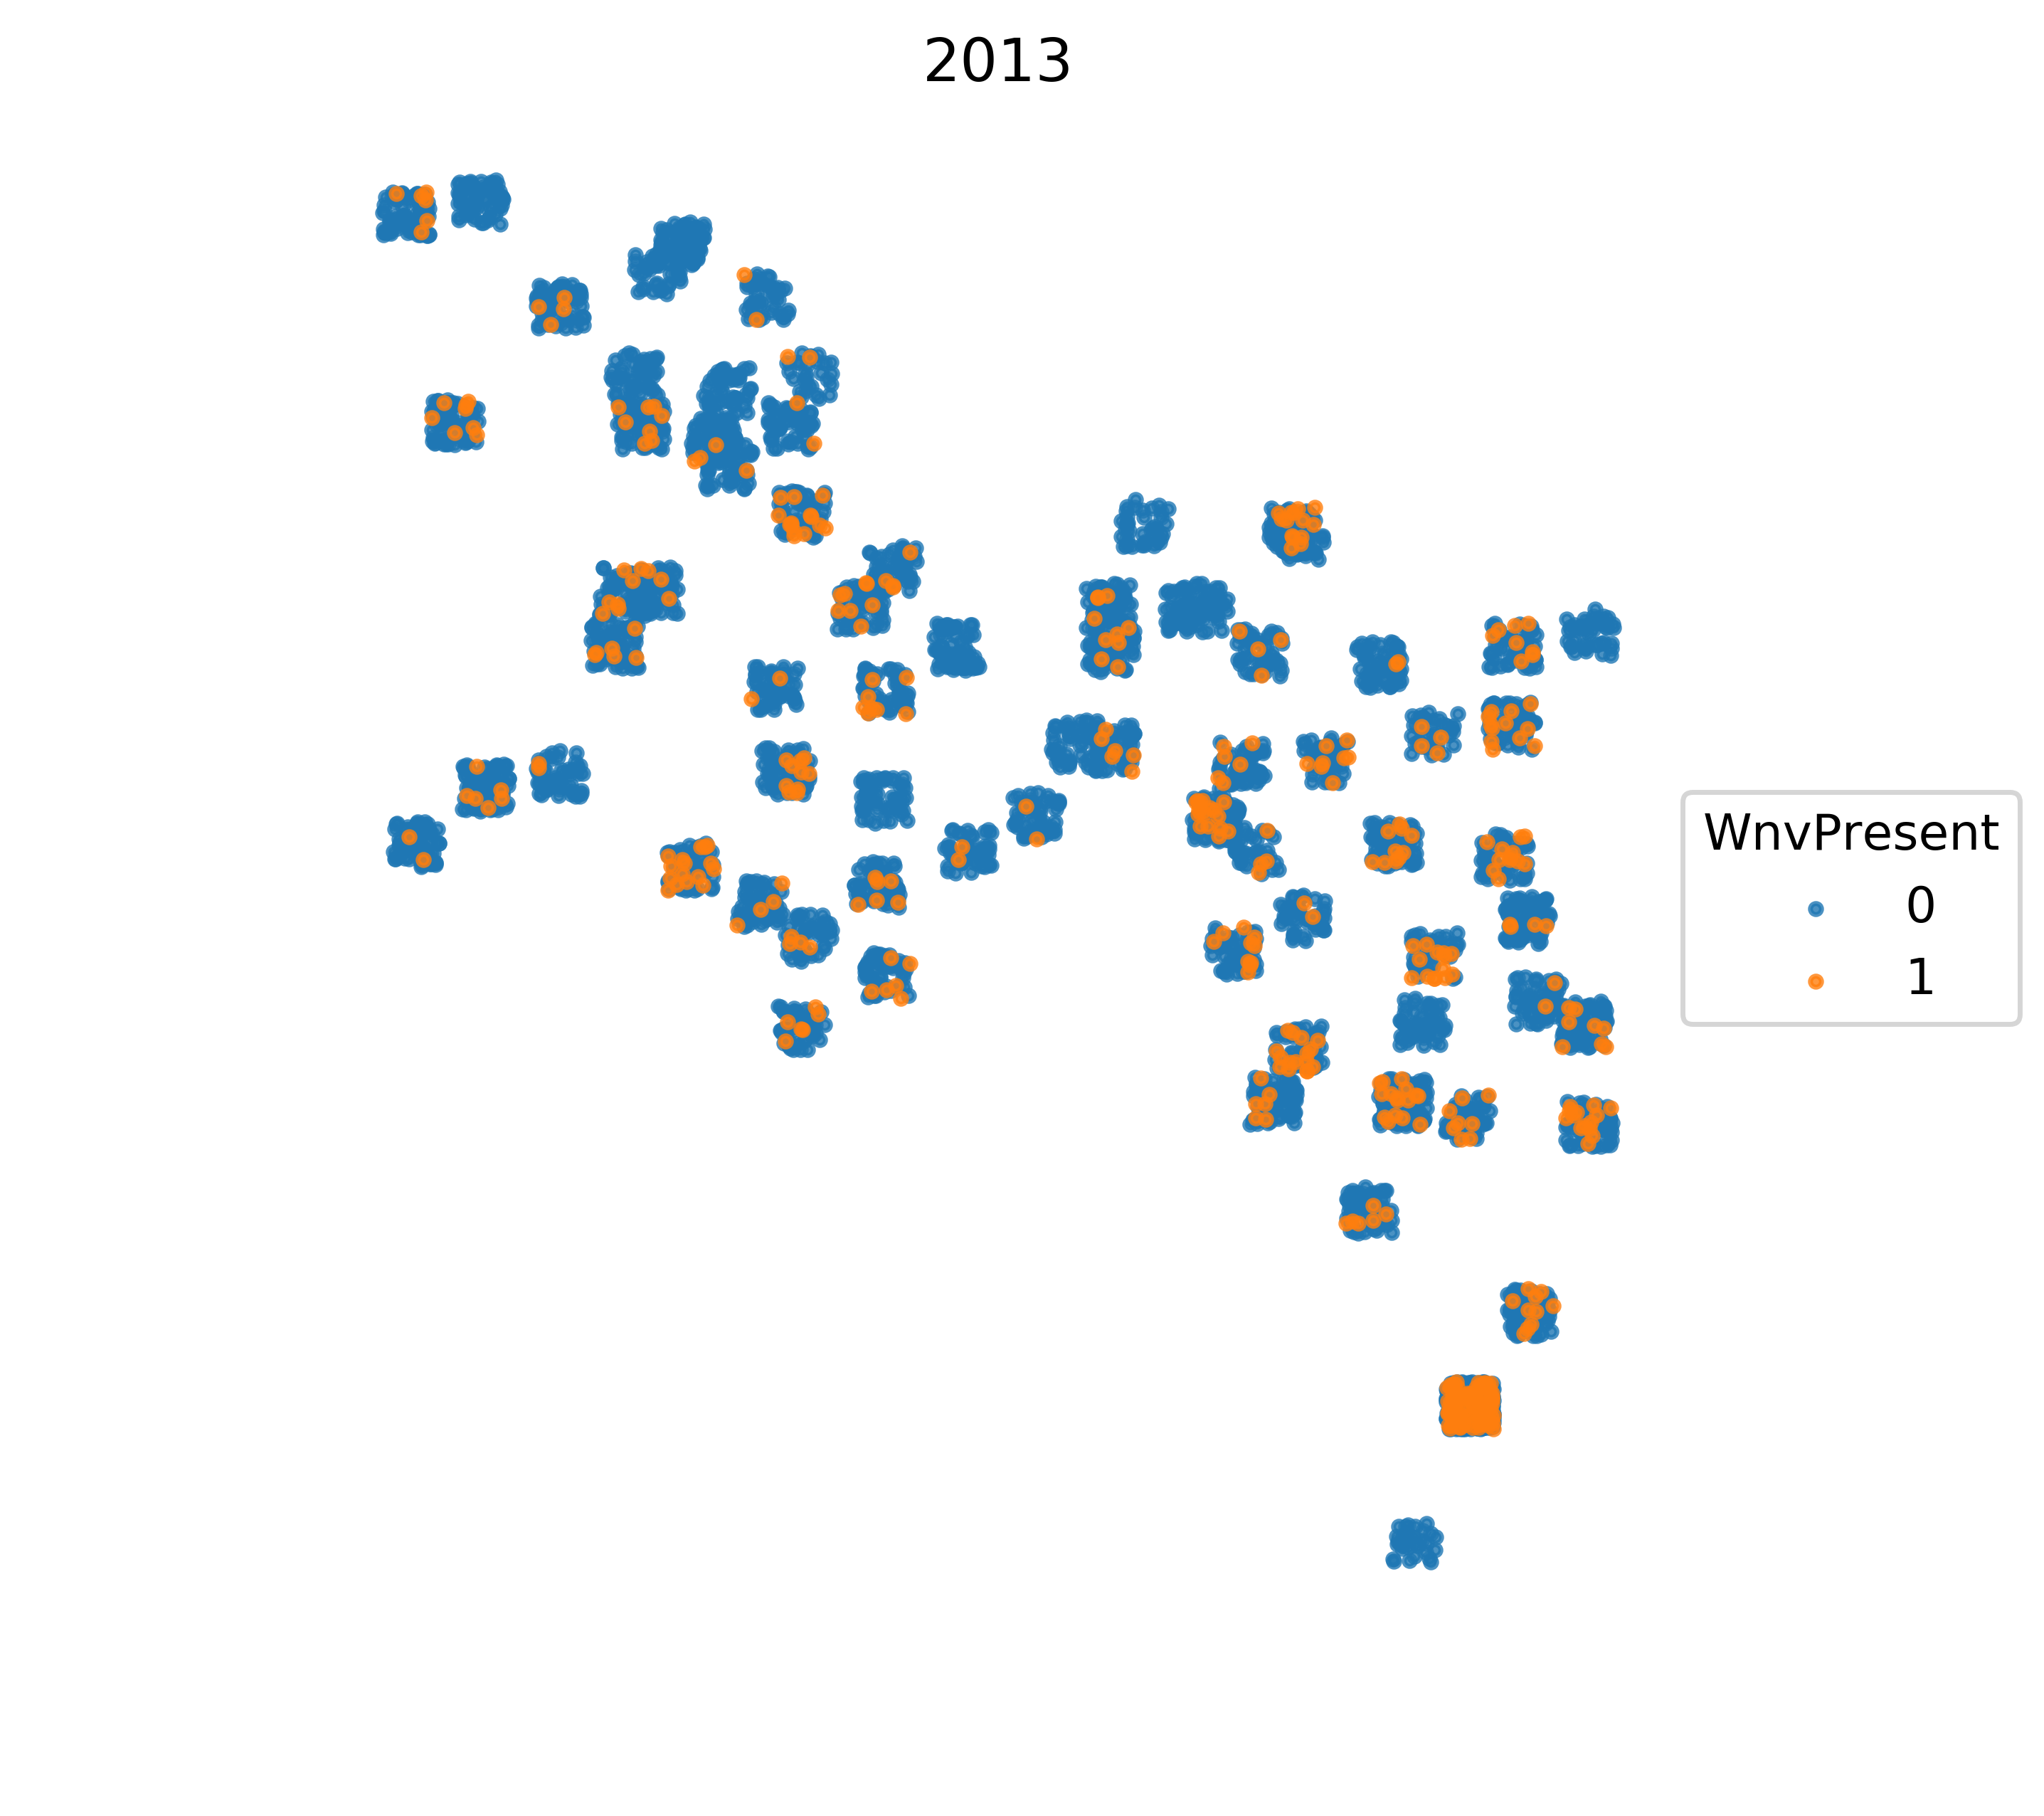

2014 0


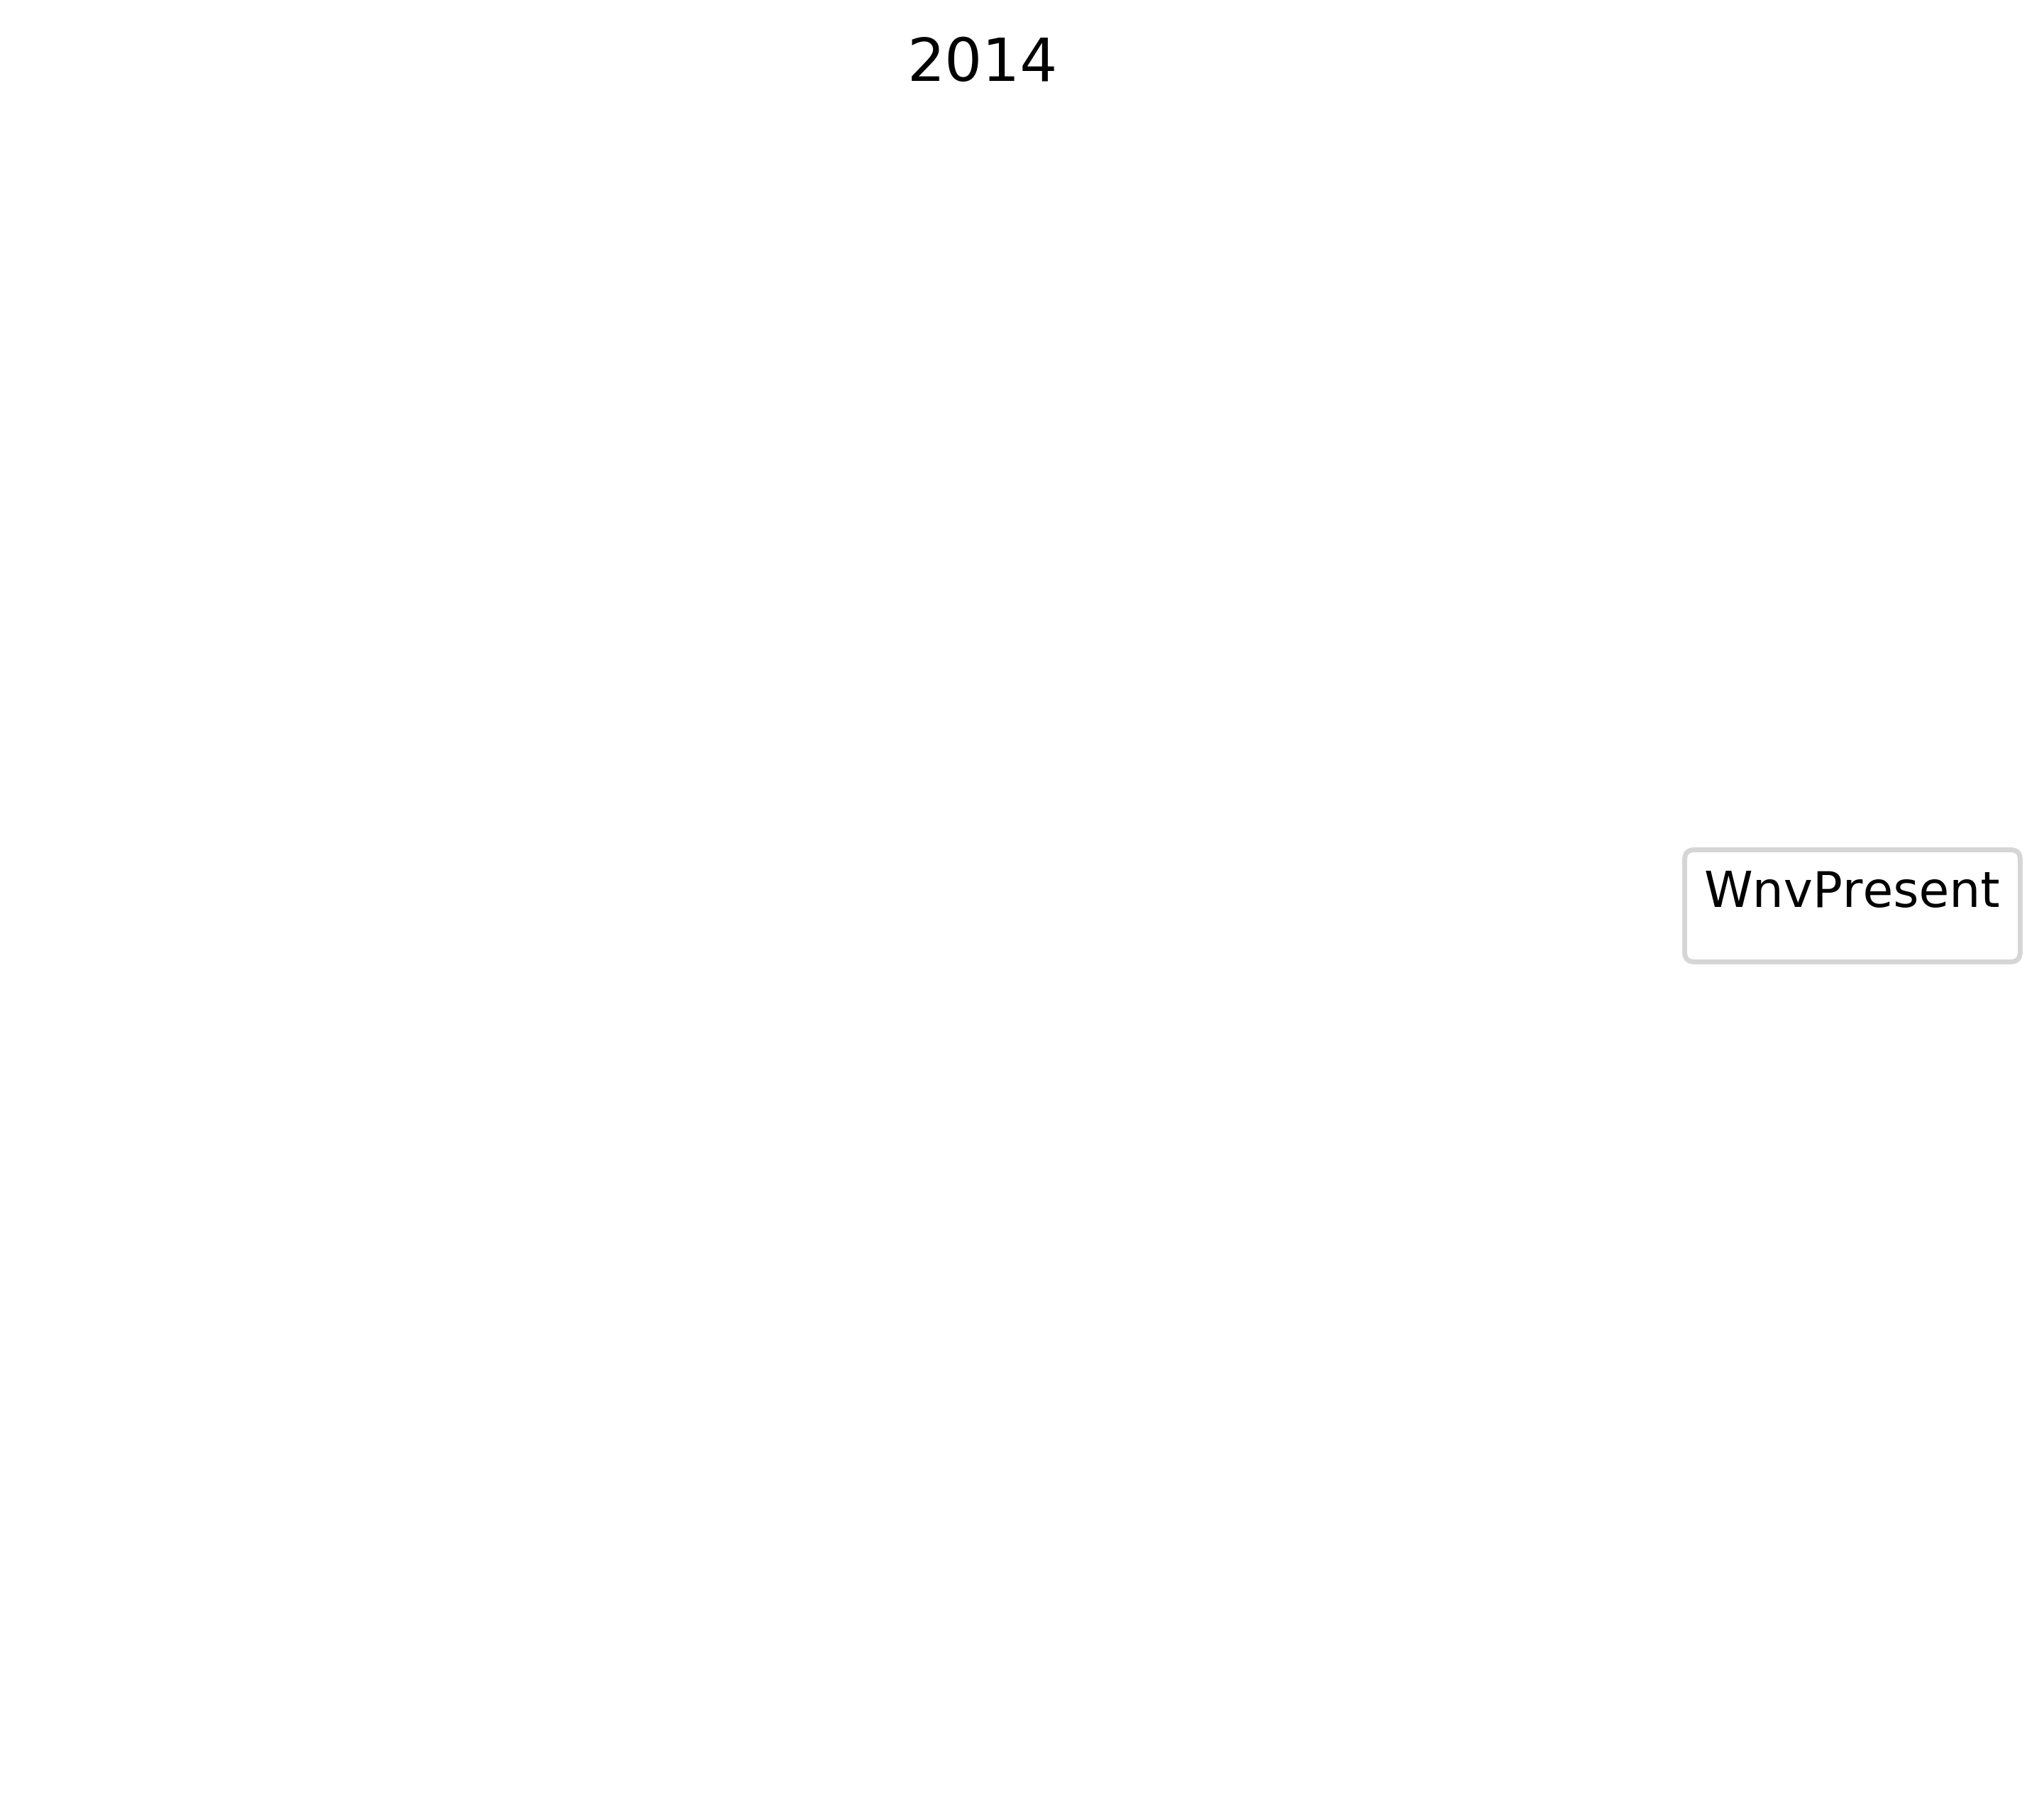

In [16]:
for year in range(2007, 2015, 1):
    data = mosquitos[mosquitos['year'] == year]
    print(year, data.shape[0])
    sns.lmplot('Latitude', # Horizontal axis
               'Longitude', # Vertical axis
               data=data, # Data source
               fit_reg=False, # Don't fix a regression line
               hue='WnvPresent', # Set color
               x_jitter=0.007,
               y_jitter=0.007,
               scatter_kws={"marker": ".", # Set marker style
                            "s": 5}) # S marker size
    plt.title(year)
    plt.axis('off')
    plt.show()

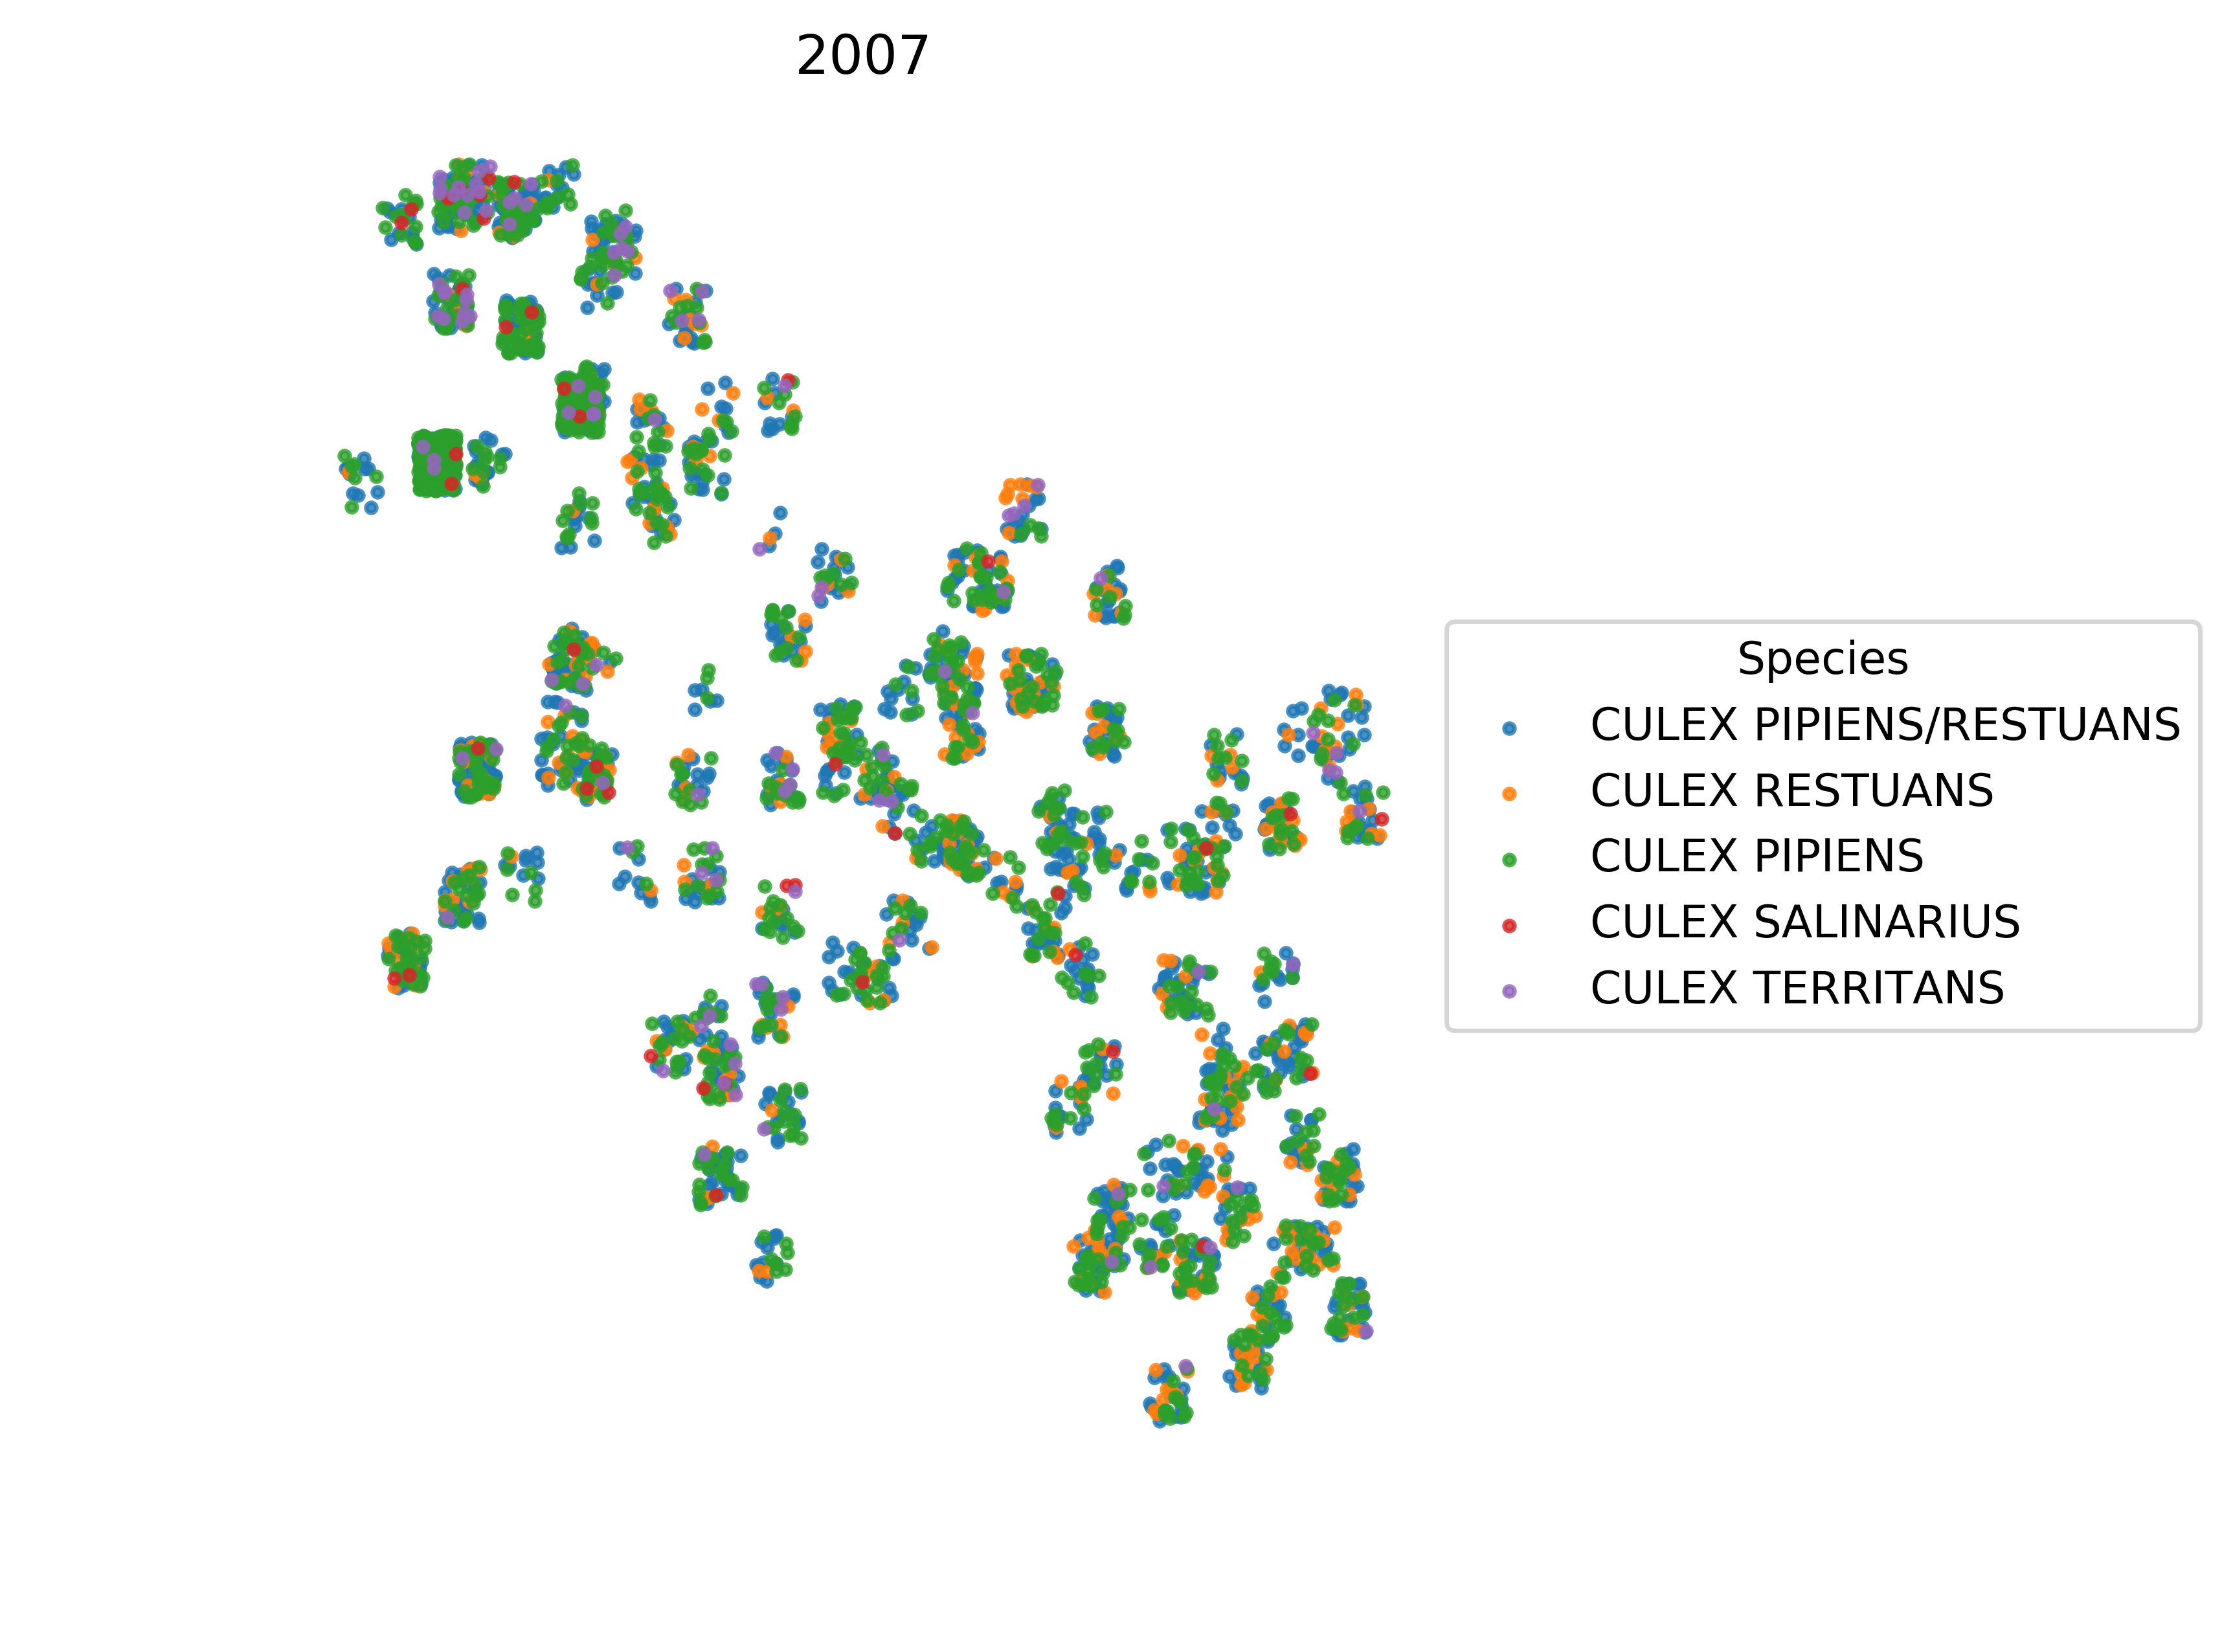

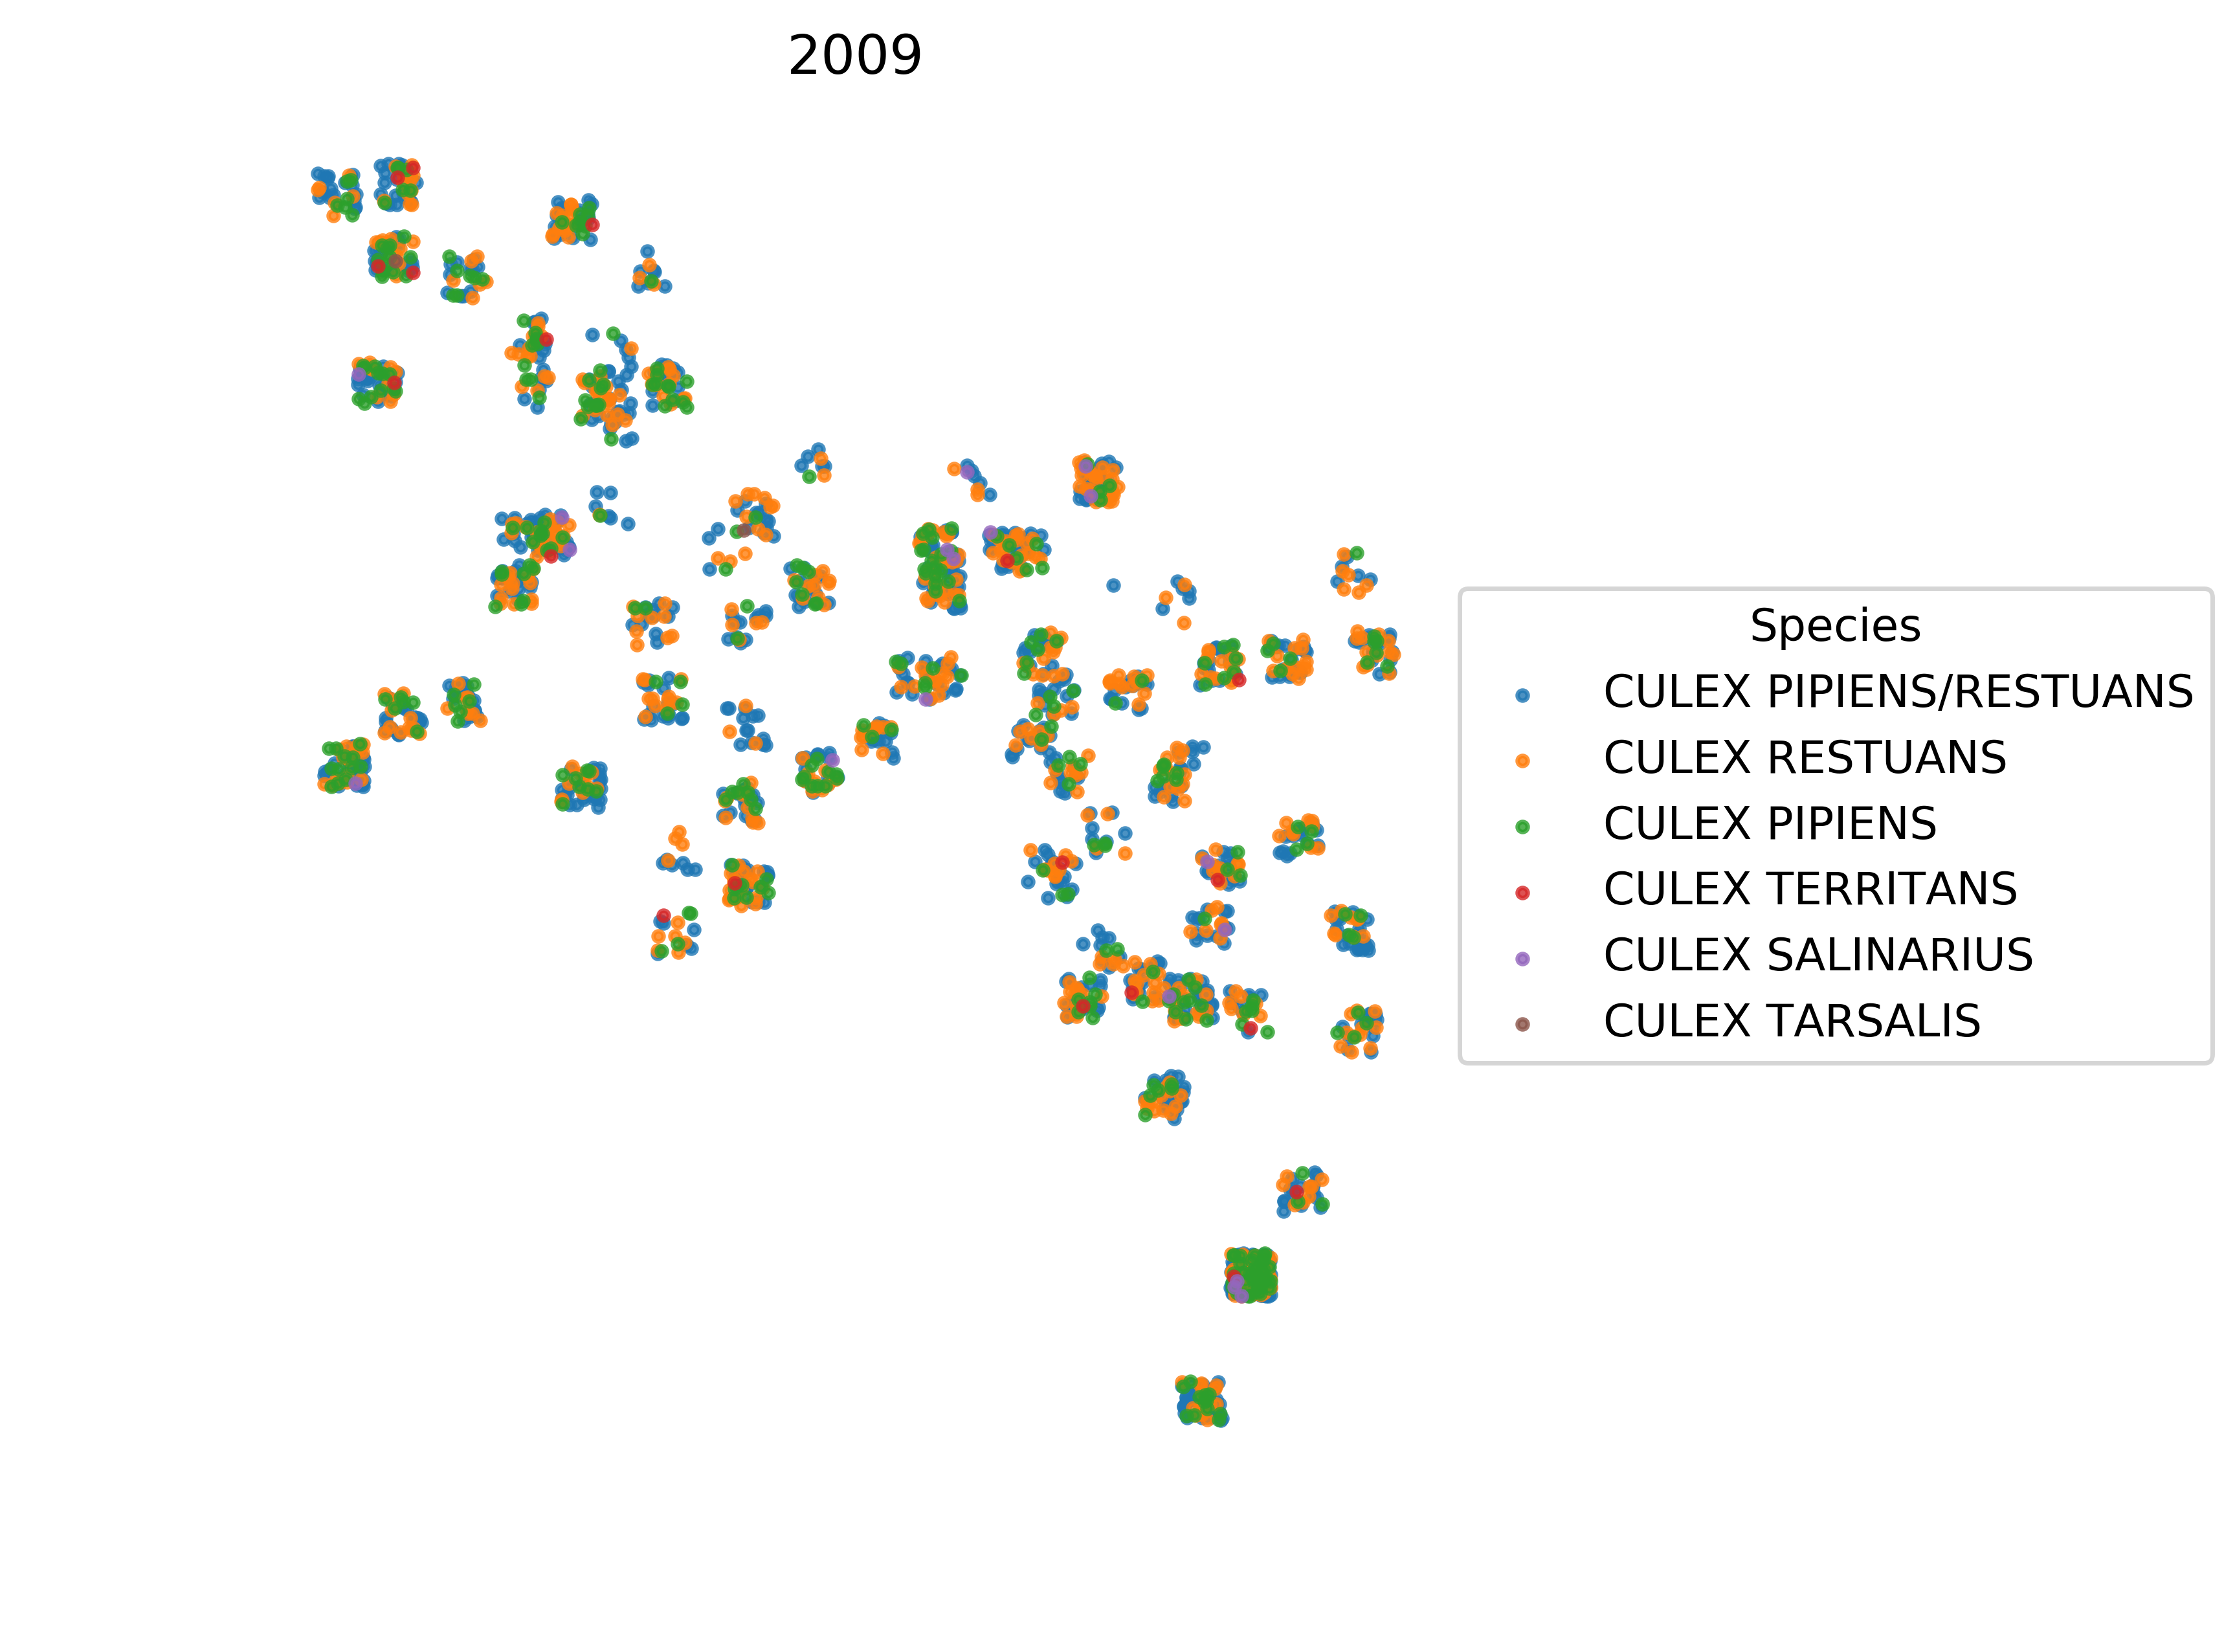

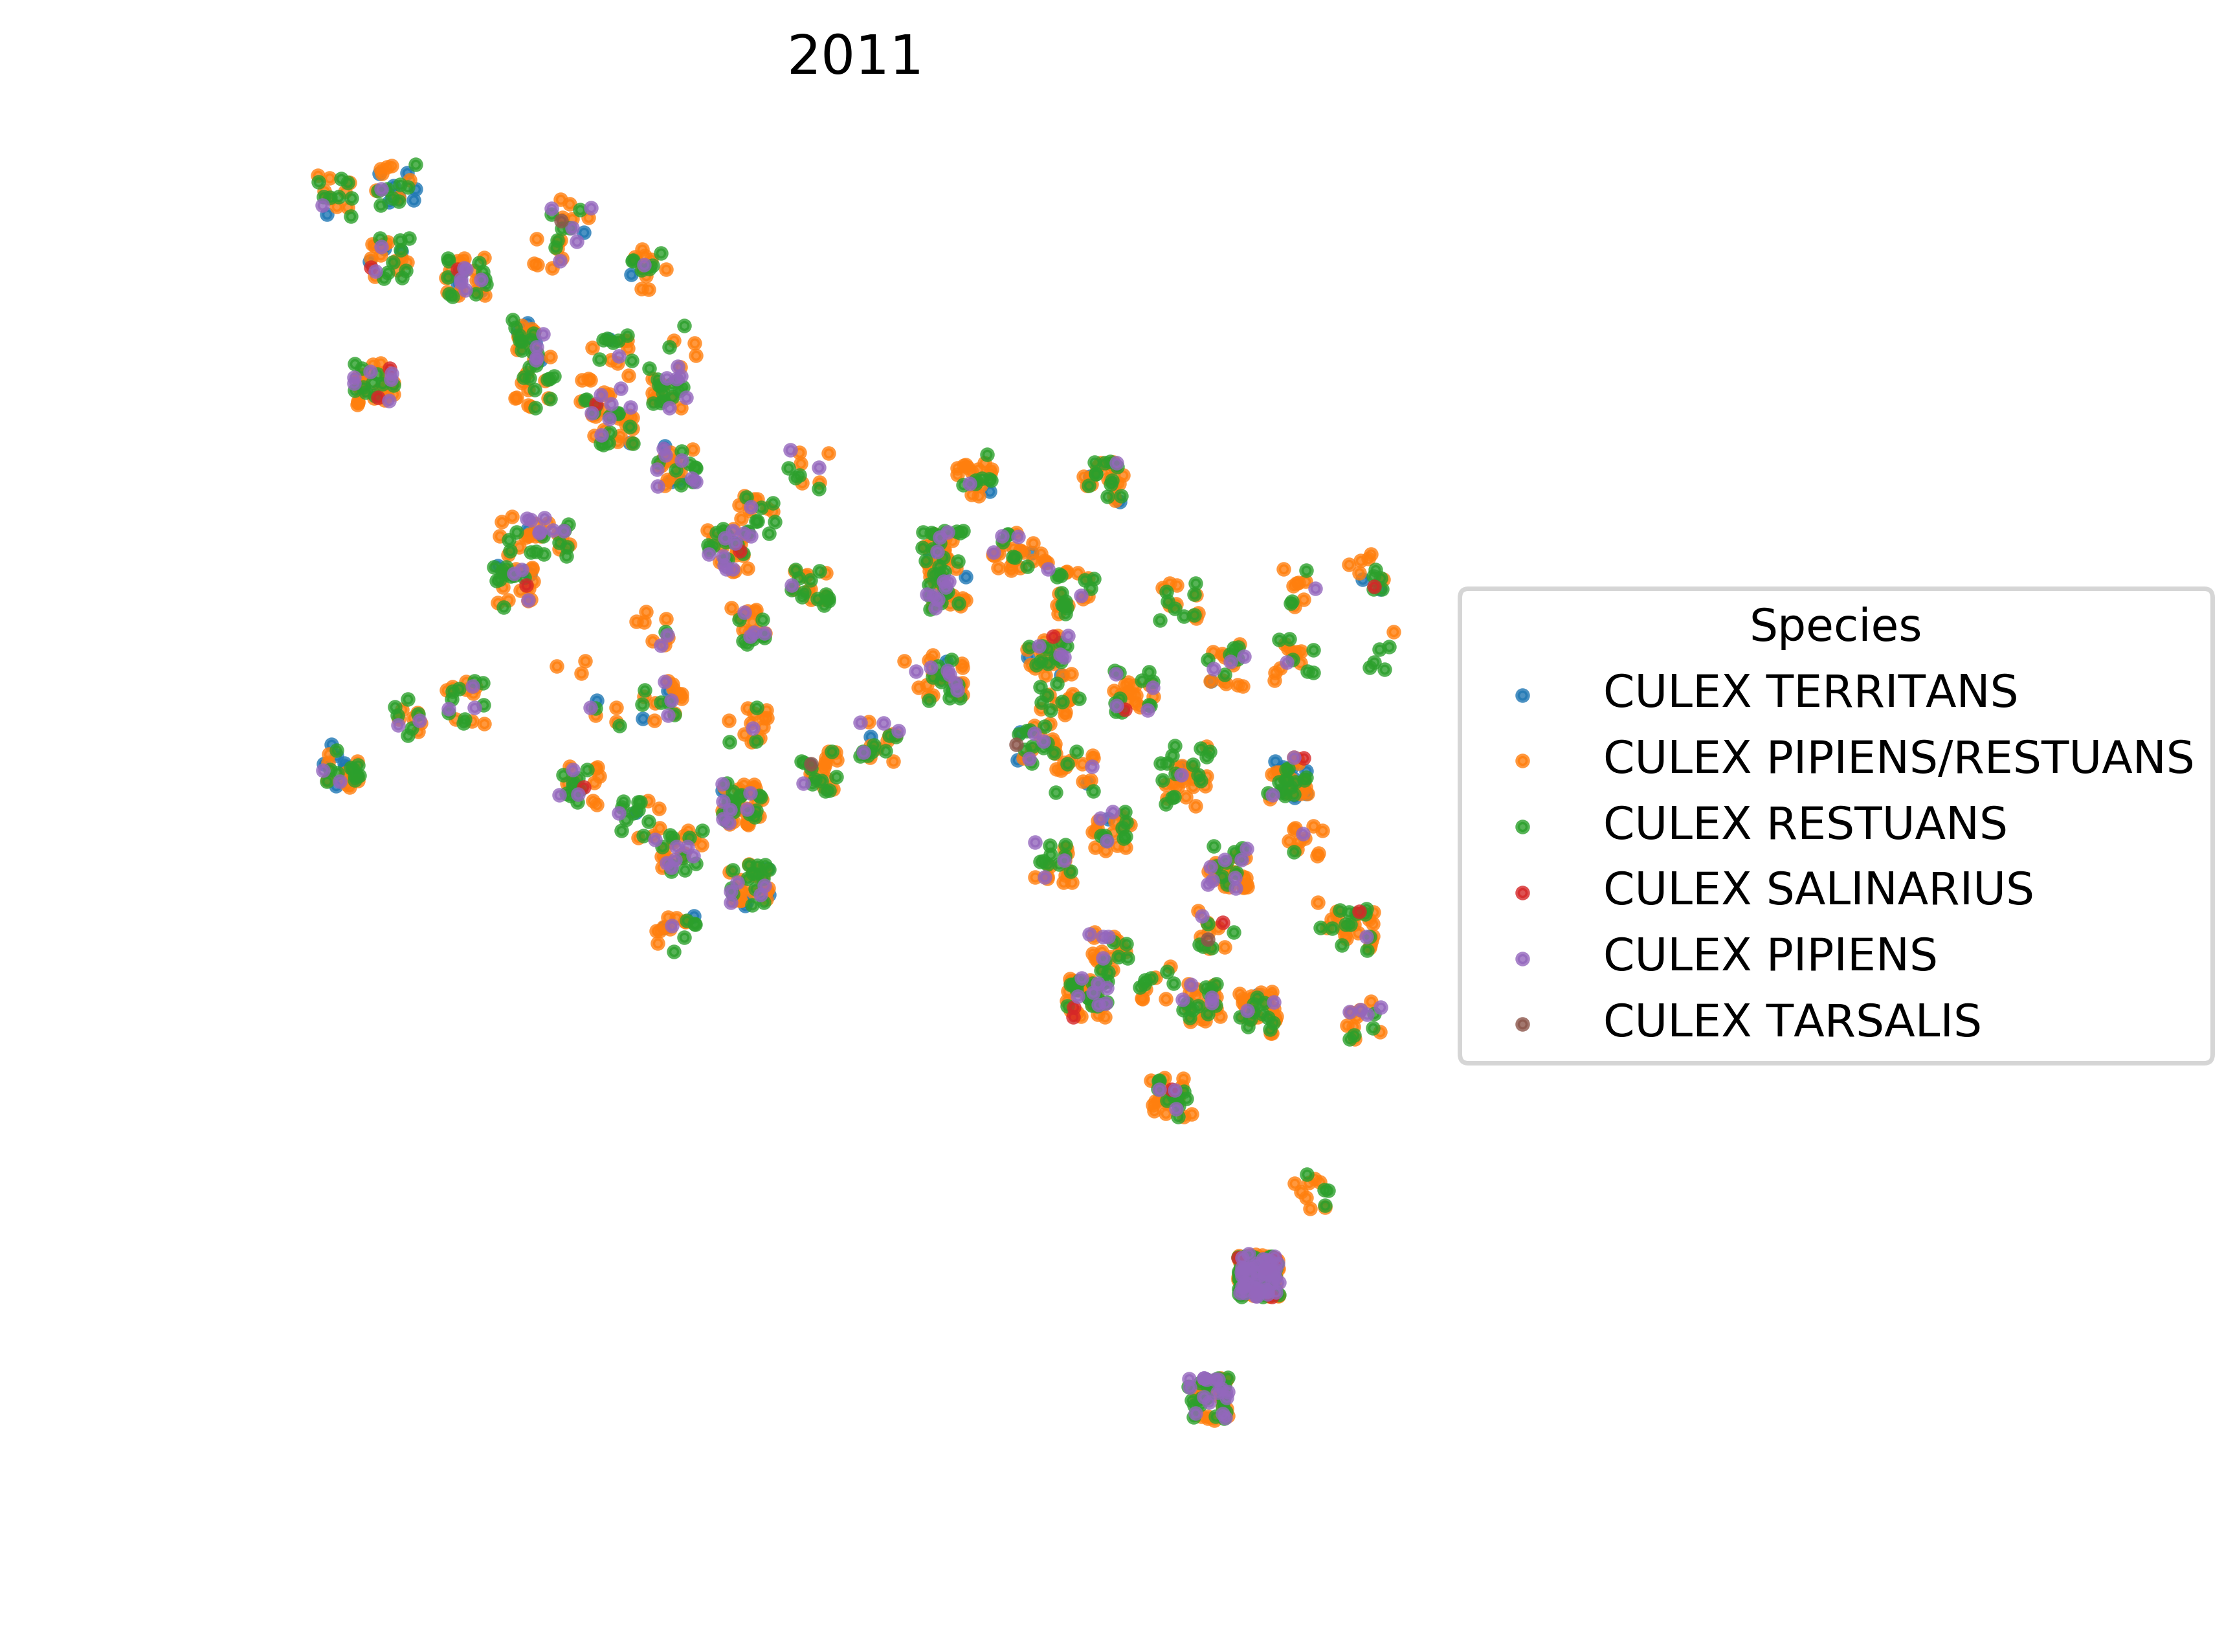

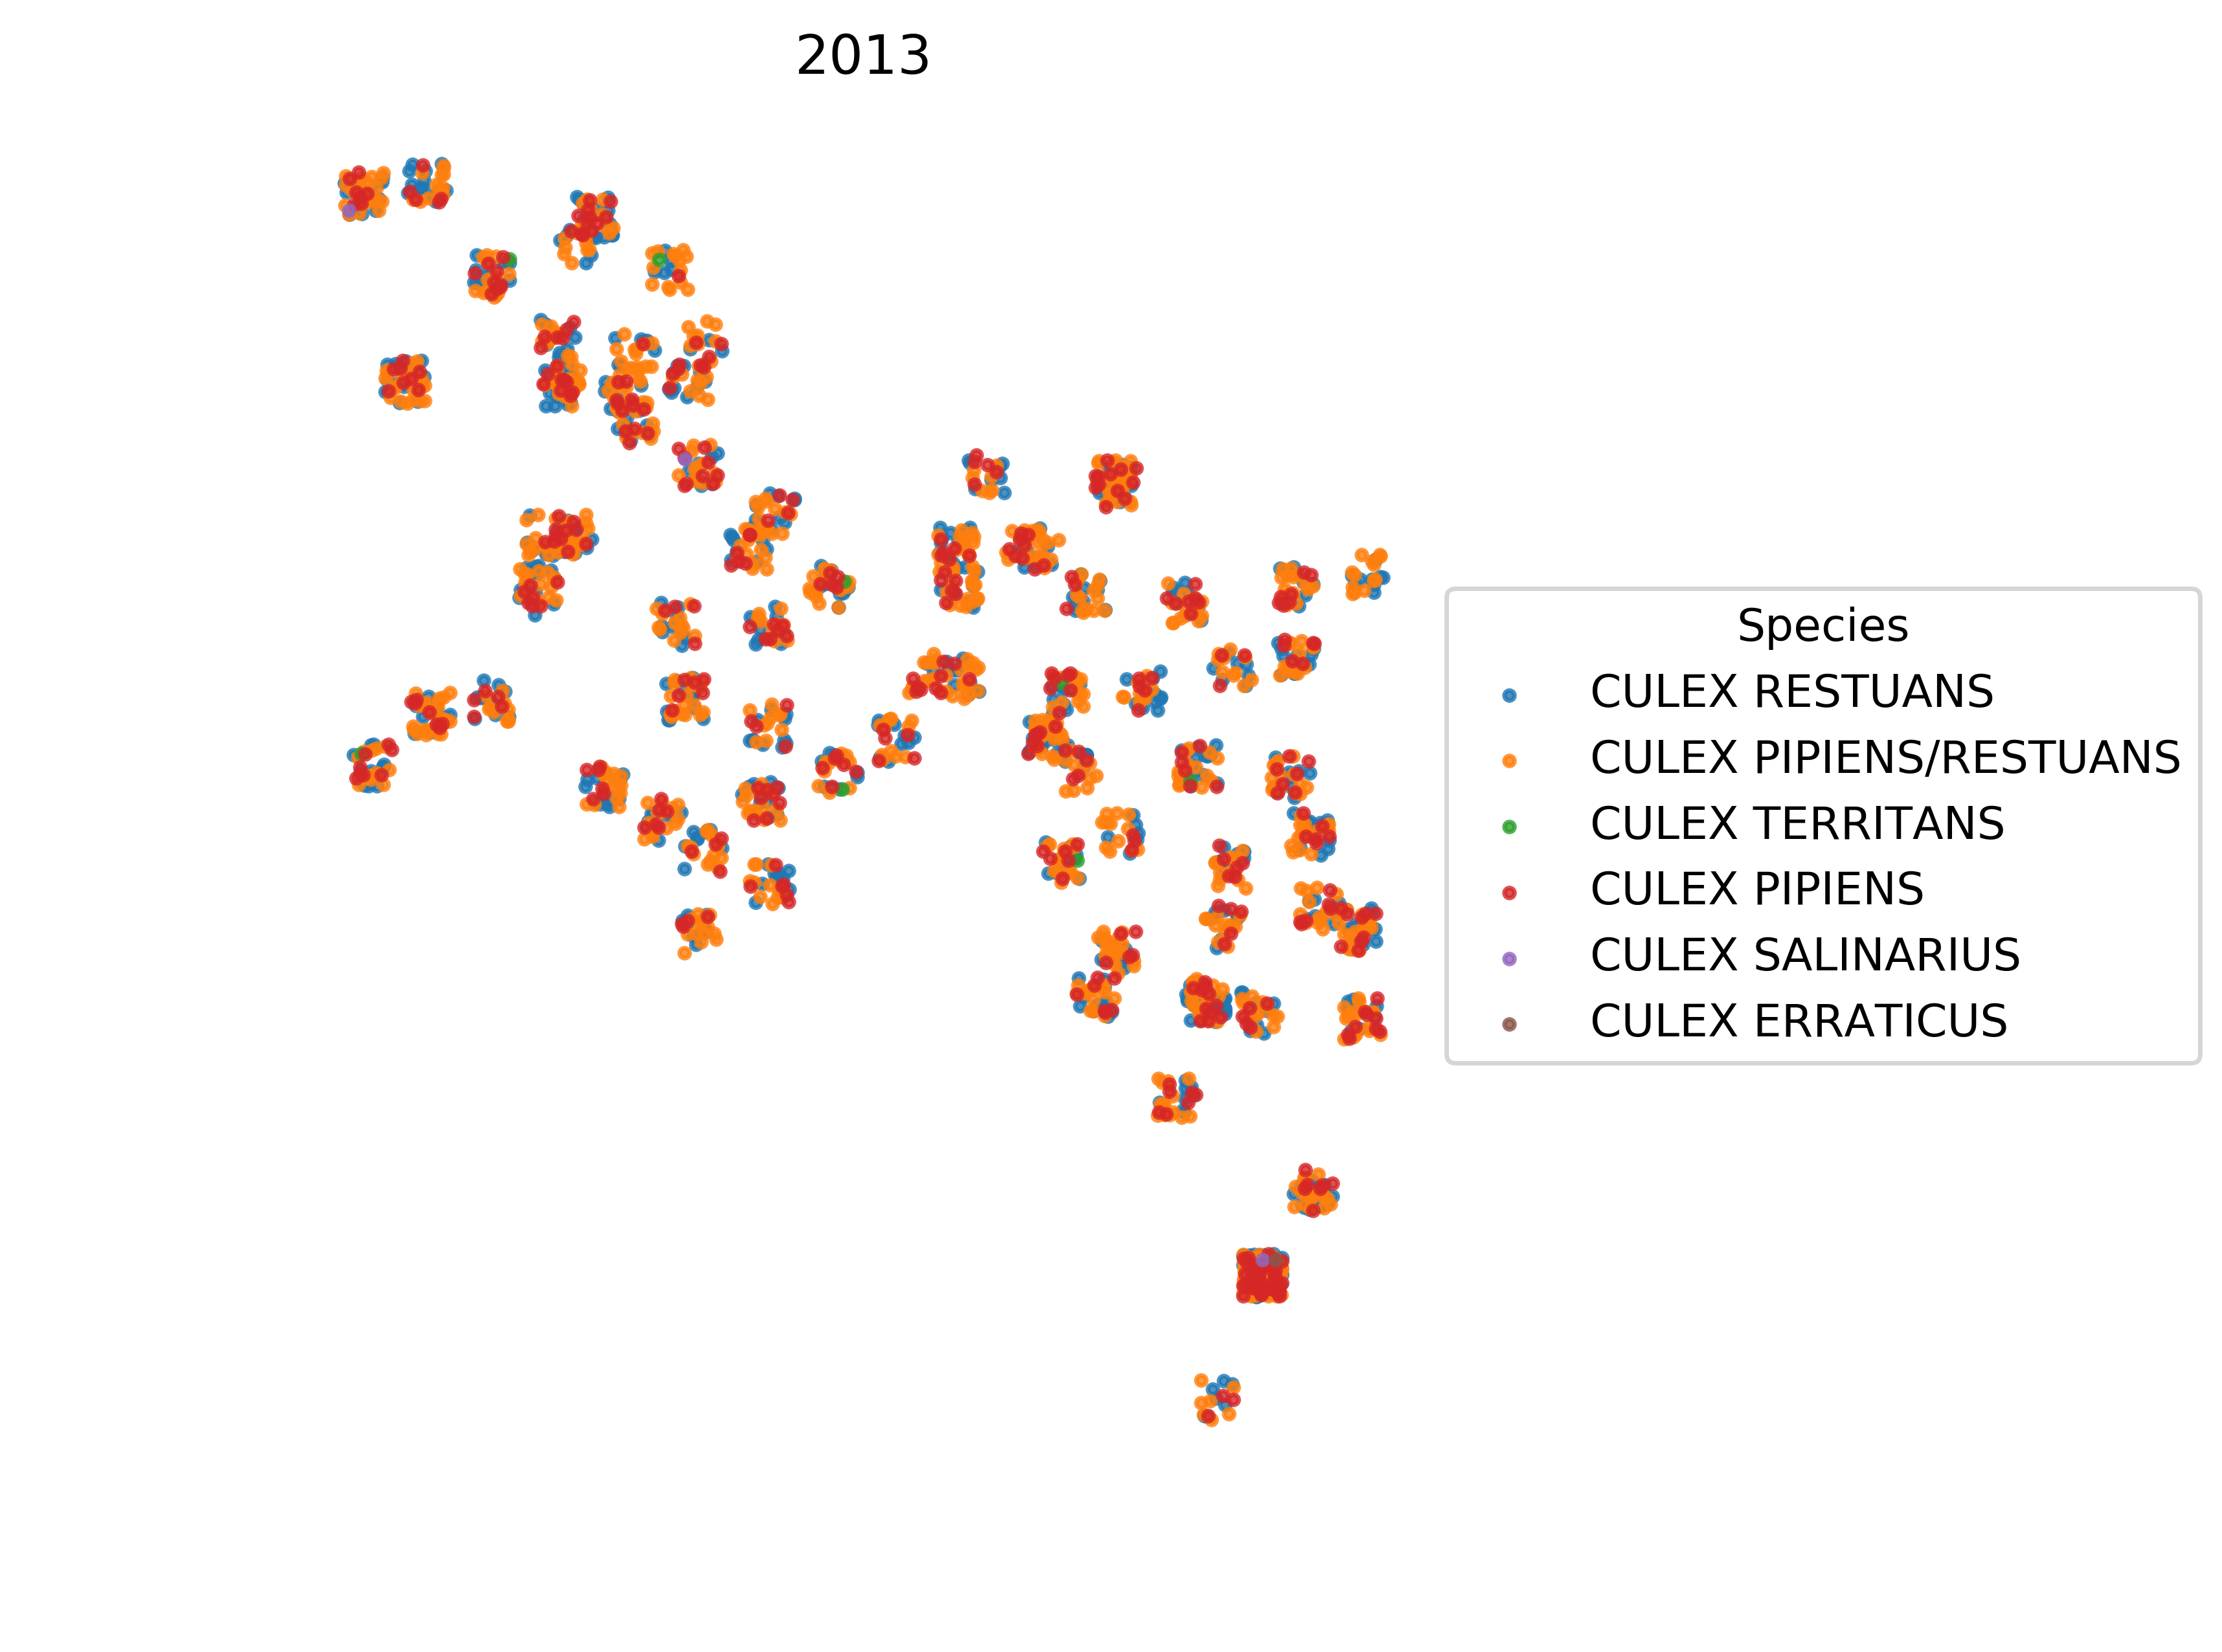

In [17]:
for year in range(2007, 2015, 2):
    sns.lmplot('Latitude', # Horizontal axis
               'Longitude', # Vertical axis
               data=train[train['year'] == year], # Data source
               fit_reg=False, # Don't fix a regression line
               hue='Species', # Set color
               x_jitter=0.007,
               y_jitter=0.007,
               scatter_kws={"marker": ".", # Set marker style
                            "s": 5}) # S marker size
    plt.title(year)
    plt.axis('off')
    plt.show()